<a href="https://colab.research.google.com/github/Rehabah/Data-Science-and-AI-Tweets_Analysis/blob/main/Copy_of_Latest_vesion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Analysis Edited on 31 OCT 2021

In [ ]:
pip install pyarabic 

     |████████████████████████████████| 126 kB 14.2 MB/s 


In [ ]:
pip install arabic_reshaper

In [ ]:
pip install  python-bidi

In [ ]:
pip install emoji

     |████████████████████████████████| 170 kB 14.7 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=94d91efb5d46fe69deb3b2ad37dd015df7d8e0369ff7da3d8f18c9021510b34f
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [ ]:
pip install stop_words

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32912 sha256=0bfce2807c97bc972e8133717e9c192846edafa6d4be29ff2caefd26c1ac0c61
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
import numpy as np
import emoji
import re
from wordcloud import WordCloud
import plotly
import plotly.offline as py
import plotly.graph_objs as go
from sklearn.feature_extraction.text import  CountVectorizer
import pyarabic.araby as araby
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Loading Data Files

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [1]:

data_ds = pd.DataFrame()
import glob
for f in glob.glob("/*.xlsx"):
  print(f)
  if (f=='DS_part19_july_with_dup.xlsx' or f=='DS_part21_with_dup.xlsx'):
      continue
  else:
      df = pd.read_excel(f)
      data_ds = data_ds.append(df,ignore_index=True)

In [ ]:
len(data_ds)

368838

In [ ]:
data1=pd.read_excel('/DS_part19_july_with_dup.xlsx')
data2=pd.read_excel('/DS_part21_with_dup.xlsx')

In [ ]:
data_ds1=pd.concat([data_ds,data1,data2])

In [ ]:
#Copying dataframe
data_df=data_ds1

In [ ]:
len(data_ds1)

373424

In [ ]:
data_ds1.columns

Index(['user_id', 'status_id', 'created_at', 'screen_name', 'text', 'source',
       'display_text_width', 'reply_to_status_id', 'reply_to_user_id',
       'reply_to_screen_name', 'is_quote', 'is_retweet', 'favorite_count',
       'retweet_count', 'quote_count', 'reply_count', 'hashtags', 'symbols',
       'urls_url', 'urls_t.co', 'urls_expanded_url', 'media_url', 'media_t.co',
       'media_expanded_url', 'media_type', 'ext_media_url', 'ext_media_t.co',
       'ext_media_expanded_url', 'ext_media_type', 'mentions_user_id',
       'mentions_screen_name', 'lang', 'quoted_status_id', 'quoted_text',
       'quoted_created_at', 'quoted_source', 'quoted_favorite_count',
       'quoted_retweet_count', 'quoted_user_id', 'quoted_screen_name',
       'quoted_name', 'quoted_followers_count', 'quoted_friends_count',
       'quoted_statuses_count', 'quoted_location', 'quoted_description',
       'quoted_verified', 'retweet_status_id', 'retweet_text',
       'retweet_created_at', 'retweet_source', 

In [ ]:
data_ds1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373424 entries, 0 to 2368
Data columns (total 90 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   user_id                  373424 non-null  int64         
 1   status_id                373424 non-null  int64         
 2   created_at               373424 non-null  datetime64[ns]
 3   screen_name              373424 non-null  object        
 4   text                     373424 non-null  object        
 5   source                   373387 non-null  object        
 6   display_text_width       373424 non-null  int64         
 7   reply_to_status_id       32721 non-null   float64       
 8   reply_to_user_id         33604 non-null   float64       
 9   reply_to_screen_name     33604 non-null   object        
 10  is_quote                 373424 non-null  bool          
 11  is_retweet               373424 non-null  bool          
 12  favorite_count    

In [ ]:
data_ds1.isnull().sum()

user_id                        0
status_id                      0
created_at                     0
screen_name                    0
text                           0
                           ...  
profile_expanded_url      263704
account_lang              373424
profile_banner_url         67038
profile_background_url    181166
profile_image_url              0
Length: 90, dtype: int64


Unrelated tweets



In [ ]:
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('وجه الله')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('ياتي يطوى')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('حالات الابتزاز')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('الله')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('غور')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('الخصم التسويقي')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('وخالق الخلق')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('مطلقة')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('لزرع البذور')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('الولاه')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('الولاة')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('معلومات_زراعية')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('اله')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('الاله')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('الإلهِ')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('إلهي')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('مصر علمتنا')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('أصول الفقة')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('الفتاوى')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('نمشـى')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('الدبلوماسيه')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('ياالرب يرجون')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('الدعم النفسي')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('حبك')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('الإله')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('الدعم النفسي')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('سجود العظمتك')].index)]

In [ ]:
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('غور الاردن')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('وجه الله')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('ياتي يطوى')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('الله')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('الخصم التسويقي')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('إلهي')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('الإلهِ')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('الاله')].index)] #الإله 
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('اله')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('معلومات_زراعية')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('الولاة')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('الولاه')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('مطلقة')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('لزرع البذور')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('وخالق الخلق')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('سجود العظمتك')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('الدعم النفسي')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('الإله')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('ياالرب يرجون')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('حبك')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('الدبلوماسيه')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('نمشـى')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('الفتاوى')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('أصول الفقة')].index)]
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('مصر علمتنا')].index)] #نسبه الاميه
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('الإله')].index)] #الإله  
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('مصر التي علمتنا')].index)]#مصر التي علمتنا
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('نسبة الامية')].index)]#مصر التي علمتنا
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('نسبة الأمية')].index)]#مصر التي علمتنا
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('آل البيت')].index)]#مصر التي علمتنا
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('يجب على بنوك')].index)]#مصر التي علمتنا
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('تطبيق صحتي')].index)]#مصر التي علمتنا
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('برنامج البنك')].index)]#مصر التي علمتنا
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('بيانات جنس طفلة')].index)]#مصر التي علمتنا
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('البنك العربي')].index)]#مصر التي علمتنا
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('بركان الشهوات منذ الأزل')].index)]#مصر التي علمتنا
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains('المنظمات_الدولية')].index)]#مصر التي علمتنا
data_ds1=data_ds1[~data_ds1.index.isin(data_ds1.loc[data_ds1['text'].str.contains(' الكيان الصهيوني')].index)]#مصر التي علمتنا

data_ds1

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favorite_count,retweet_count,quote_count,reply_count,hashtags,symbols,urls_url,urls_t.co,urls_expanded_url,media_url,media_t.co,media_expanded_url,media_type,ext_media_url,ext_media_t.co,ext_media_expanded_url,ext_media_type,mentions_user_id,mentions_screen_name,lang,quoted_status_id,quoted_text,quoted_created_at,quoted_source,quoted_favorite_count,quoted_retweet_count,quoted_user_id,quoted_screen_name,...,retweet_source,retweet_favorite_count,retweet_retweet_count,retweet_user_id,retweet_screen_name,retweet_name,retweet_followers_count,retweet_friends_count,retweet_statuses_count,retweet_location,retweet_description,retweet_verified,place_url,place_name,place_full_name,place_type,country,country_code,geo_coords,coords_coords,bbox_coords,status_url,name,location,description,url,protected,followers_count,friends_count,listed_count,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
1,1282059281257373698,1377512239465431042,2021-04-01 06:44:45,MohamedRshwan17,#المختصر_المفيد_من_علم_البيانات\nتحت هذي التغر...,Twitter for Android,140,NaN,NaN,NaN,False,True,0,97,NaN,NaN,المختصر_المفيد_من_علم_البيانات,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1373291454752251910,khaliidviip,ar,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,Twitter Web App,499.0,97.0,1.373291e+18,khaliidviip,خالد ابو ابراهيم,3469.0,83.0,476.0,السعودية,تقني,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://twitter.com/MohamedRshwan17/status/137...,Mohamed Rshwan,NaN,‏ ‏(اڷڷهم-آنے 'آمنت بقضآئگ-وقدرگ-فآرزقنے-مآ آت...,NaN,False,15,617,0,42,45,2020-07-11 21:09:18,False,NaN,NaN,NaN,NaN,NaN,http://pbs.twimg.com/profile_images/1282059580...
2,1025086727885660160,1377357076591181824,2021-03-31 20:28:11,ElkhalafyAbeer,الحمدلله، أنتهيت العمل على مشروع ترجمة كتاب\nP...,Twitter for Android,140,NaN,NaN,NaN,False,True,0,240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69053898,alioh,ar,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,Twitter Web App,1017.0,240.0,6.905390e+07,alioh,Ali AlOhali - علي العوهلي,9442.0,1035.0,34416.0,Al Khobar - Saudi Arabia,"CS @XavierU. Interseted in programming, data s...",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://twitter.com/ElkhalafyAbeer/status/1377...,Dr. Abeer Elkhalafy,"القاهرة, مصر",‏د.عبير الخلفي _استشاري تربية خاصة \nأستاذ مسا...,NaN,False,1280,1633,0,4911,4590,2018-08-02 18:31:35,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/10250867...,NaN,http://pbs.twimg.com/profile_images/1322073345...
4,1345066189089886209,1377283945335771141,2021-03-31 15:37:35,intTech01,مقدمة ممتازة عن علم البيانات تشمل المتطلبات وا...,Twitter for Android,140,NaN,NaN,NaN,False,True,0,5,NaN,NaN,NaN,NaN,buff.ly/3fppOE4,https://t.co/a8q6kfcHsM,https://buff.ly/3fppOE4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1312138873678508033,ArabData2020,ar,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,Buffer,24.0,5.0,1.312139e+18,ArabData2020,شبكة تحليل البيانات,6591.0,2.0,305.0,المملكة العربية السعودية,حساب مهتم بعلم وتحليل البيانات باستخدام لغات ا...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://twitter.com/intTech01/status/137728394...,int Tech;,NaN,حساب مهتم بنشر المعلومات التقنية حول تعلم الأل...,NaN,False,65,46,0,37,18,2021-01-01 17:55:54,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/13450661...,NaN,http://pbs.twimg.com/profile_images/1345071784...
5,896932325791084544,1377279597394415626,2021-03-31 15:20:19,zahranilearner,#المختصر_المفيد_من_علم_البيانات\nتحت هذي التغر...,Twitter Web App,140,NaN,NaN,NaN,False,True,0,97,NaN,NaN,المختصر_المفيد_من_علم_البيانات,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1373291454752251910,khaliidviip,ar,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,Twitter Web App,499.0,97.0,1.373291e+18,khaliidviip,خالد ابو ابراهيم,3469.0,83.0,476.0,السعودية,تقني,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,htt

In [ ]:
len(data_ds1)

318898

In [ ]:
len(data_ds1['user_id'].unique())

11358

In [ ]:
pd.set_option('display.float_format', lambda x: '%0f' % x)
pd.set_option('display.max_colwidth', None)

In [ ]:
print('retweet',len(data_ds1.loc[data_ds1['is_retweet']==True]))
print('not retweet',len(data_ds1.loc[data_ds1['is_retweet']==False]))

retweet 248708
not retweet 70190


Data **Preprocessing**

In [ ]:
import datetime
data_ds1['created_at1']=data_ds1['created_at'].dt.date  
data_ds1['account_created_at1']=data_ds1['account_created_at'].dt.date
data_ds1['retweet_created_at1']=data_ds1['retweet_created_at'].dt.date  

In [ ]:
def avg_word(sentence):
    words = sentence.split()
    if len(words) == 0:
        return 0
    return (sum(len(word) for word in words)/len(words))

def emoji_counter(sentence):
    return emoji.emoji_count(sentence)
data_ds1['hash_counts'] = data_ds1['text'].apply(lambda x: len(str(x).split("#")))
data_ds1['mention_counts'] = data_ds1['text'].apply(lambda x: len(str(x).split("@")))
data_ds1['word_count'] = data_ds1['text'].apply(lambda x: len(str(x).split(" ")))
data_ds1['char_count'] = data_ds1['text'].str.len() ## this also includes spaces
data_ds1['avg_char_per_word'] = data_ds1['text'].apply(lambda x: avg_word(x))
stop = stopwords.words('arabic')
data_ds1['stopwords'] = data_ds1['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
data_ds1['emoji_count'] = data_ds1['text'].apply(lambda x: emoji_counter(x))
data_ds1 = data_ds1.sort_values(by='word_count',ascending=[0])
#data_ds1.head()

In [ ]:
# part1=data_ds1.loc[data_ds1['is_retweet']==True]

In [ ]:
# part1[['screen_name','retweet_screen_name','status_url']]

In [ ]:
df=data_ds1.drop_duplicates(['user_id', 'status_id', 'screen_name', 'text', 'source',
       'display_text_width', 'reply_to_status_id', 'reply_to_user_id',
       'reply_to_screen_name', 'is_quote', 'is_retweet',  'hashtags', 'symbols',
       'urls_url', 'urls_t.co', 'urls_expanded_url', 'media_url', 'media_t.co',
       'media_expanded_url', 'media_type', 'ext_media_url', 'ext_media_t.co',
       'ext_media_expanded_url', 'ext_media_type', 'mentions_user_id',
       'mentions_screen_name', 'lang', 'quoted_status_id', 'quoted_text',
       'quoted_source',  'quoted_user_id', 'quoted_screen_name',
       'quoted_name',  'quoted_location', 
       'quoted_verified', 'retweet_status_id', 'retweet_text',
        'retweet_source',  'retweet_user_id', 'retweet_screen_name',
       'retweet_name',  'retweet_location', 'retweet_description',
       'retweet_verified', 'place_url', 'place_name', 'place_full_name',
       'place_type', 'country', 'country_code', 'geo_coords', 'coords_coords',
       'bbox_coords', 'status_url', 'name', 'location',  'url',
       'protected',  'account_created_at', 'verified',
        'account_lang'],keep='first')


In [ ]:
len(df) 

22731

In [ ]:
len(data_ds1)

318898

In [ ]:
len(df)

22731

In [ ]:

len(df['user_id'].unique())

11358

In [ ]:
print('retweet',len(df.loc[df['is_retweet']==True]))
print('original',len(df.loc[df['is_retweet']==False]))

retweet 17779
original 4952


Data Exploring

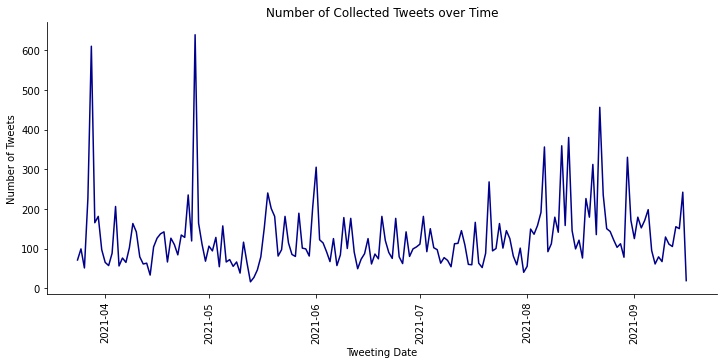

In [ ]:
#Data collection over time
df.groupby(['created_at1'])['text'].count().plot(kind='line',rot='vertical',figsize=(12,5),color='darkblue')
plt.title('Number of Collected Tweets over Time')
plt.ylabel('Number of Tweets')
plt.xlabel('Tweeting Date')
sns.despine()

In [ ]:
df.groupby(['created_at1'])['text'].count().nlargest(10)

created_at1
2021-04-27    639
2021-03-28    610
2021-08-22    456
2021-08-13    380
2021-08-11    359
2021-08-06    356
2021-08-30    330
2021-08-20    312
2021-06-01    305
2021-07-21    268
Name: text, dtype: int64

In [ ]:
largesest_ds=df.loc[df['created_at1']==datetime.date(2021, 8, 22)]
dff=largesest_ds.groupby(['text','is_retweet','retweet_screen_name'])['user_id'].count().nlargest(10)
dff.to_frame()

,,,user_id
text,is_retweet,retweet_screen_name,
انصحوا ولادكم بهذه التخصصات دي وظائف الوقت الحالي والمستقبل :\n - الذكاء الاصطناعي AI\n - انترنت الأشياء IOT\n - البرمجة Programming\n - البيانات الضخمة Big Data\n - علوم البيانات Data science \n - التجارة الإلكترونية E-Commerce\n - Cloud Computing\n - التكنولوچيا المالية Fin tech,True,MariamEmara,280
🟢 دورة مجانية #عن_بعد (مع شهادة معتمدة):\n\nتعلن #وزارة_الاتصالات_وتقنية_المعلومات عن طرح دورة مجانية مكثفة #عن_بعد في (#علم_البيانات) لمدة (12) أسبوع و (480) ساعة، مع شهادة معتمدة من الوزارة (لا يشترط مؤهل محدد أو خبرة).\n\nالتفاصيل: https://t.co/2CMcn1gbfb\n\n#التدريب_عن_بعد https://t.co/OZRXAy0l3F,True,WadhefaDotCom,21
(🔴) برعاية من (وزارة الاتصالات):\n\nمسك الخيرية تعلن بدء التقديم في برنامج (#علم_البيانات) يُقام (#عن_بُعد)، ويُعد مجال علم البيانات الأكثر طلبًا في المستقبل، ويقدم البرنامج عدة مزايا، لتحظى بميزة تنافسية في سوق العمل، مع شهادة (بعد إتمام البرنامج).\n\nرابط: https://t.co/PSUSOrLUpj https://t.co/8AzQt9w2wR,True,ewdifh,15
🇸🇦 ✨#السعودية تتهيأ لاستقبال #السيارات_الكهربائية.. إصدار أول شهادة اعتماد👇\n\nhttps://t.co/v5p09k8lZ5\n\n#المملكة_العربية_السعودية #المدن_الذكية #تكنولوجيا #تقنية #ريادة_الأعمال_الرقمية #انترنت_الأشياء\n #ريادة_الأعمال #الامن_السيبراني #أمن_المعلومات #علم_البيانات #التحول_الرقمي,True,Khulood_Almani,9
معسكر مميز ترعاه وزارة الاتصالات وتقنية المعلومات من ضمن مبادرة #مهارات_المستقبل من خلال سلسلة من المعسكرات التدريبية​ المكثفة التي لها دور كبير في تنمية مهارات علم البيانات لأبناء وبنات الوطن.​\n\n سجّل اليوم.\nhttps://t.co/qerqxZ8m7w https://t.co/19lvQV8ZTX,True,MiskSkills,8
ماهي المهارات المطلوبة لدخول سوق #تقنية_المعلومات في #السعودية 🇸🇦؟\nهل يستطيع #علم_البيانات مساعدتنا للتعرف عليها؟ 🤔\n\nدراسة استكشافية شملت 2255 موظف استعرضها أسفل هذه التغريدة https://t.co/n9a2TxAQC1,True,Dr_Hmood,7
تعلن مسك الخيرية عن بدء التقديم في برنامج (علم البيانات) برعاية وزارة الاتصالات https://t.co/cOU96RGduK,True,btalah,5
ما هي المهارات المطلوب توفرها في الـ Data Science ؟ https://t.co/CW4N2om8eS,True,AnalystAG,4
أخيراً للمهتمين بهذه الدراسة تم نشر ورقة مؤخراً قمنا فيها ببناء نموذج تنبؤي بناءً على البيانات التي جمعناها (بيانات 2255 موظف) ، هذا النموذج يعطي توصية لخريج تخصصات الحاسب على إختيار المسار المناسب له حسب مهاراته ، الورقة متوفرة على الرابط:\nhttps://t.co/pwSLTGfS5f https://t.co/tWco7DvaYs,True,Dr_Hmood,3


In [ ]:
largesest_ds=df.loc[df['created_at1']==datetime.date(2021, 8, 13)]
dff=largesest_ds.groupby(['text','is_retweet','retweet_screen_name'])['user_id'].count().nlargest(10)
dff.to_frame()

,,,user_id
text,is_retweet,retweet_screen_name,
#ثريد مطول\nالفرق بين عالم البيانات و مهندس تعلم الآلة https://t.co/6If0Tu5E3t,True,AnalystAG,139
"شركة Microsoft اصدرت كورس Python مكون من ثلاثة مراحل للمبتدأ و المتوسط و المتقدم, لغة برمجة Python من اهم لغات البرمجة و اكثرها انتشار و ليها تطبيقات كتير جدا فى مجالات الذكاء الاصطناعى و الـ Machine learning و الـ Computer vision و حتى الالعاب و الـ Robotics و فى مجتمع المبرمجين https://t.co/cl6KPjLLIN",True,p_4all,138
⚠️تحذير لمستخدمي #واتساب و #Gmail \n\n🚫لا تفتحوا هذه الرسائل👇\n\nhttps://t.co/l6ISfMZzpB\n#الامن_السيبراني #أمن_المعلومات #علم_البيانات\n#CyberSecurity #technology #Cyberpunk2077 \n#AI #DataScience #Python #data #RPDR #5G #100DaysofCode #IoT #javascript #NodeJS #djang #bot #RHOP https://t.co/bK1jkuMqCm,True,Khulood_Almani,18
(🔴) تبدأ الدورات (الأحد ٧ محرم):\n\nتعلن #وزارة_الاتصالات دورات تدريبية (#عن_بُعد) لـ (حديثي التخرج والباحثين عن عمل والموظفين):\n\n▪️ إدارة مخاطر تقنية المعلومات\n▪️ تعلم لغة الآلة\n▪️ الرؤية الحاسوبية والذكاء الاصطناعي\n▪️ إطار العمل Laravel\n\n..وغيرها.\n\nرابط (https://t.co/uUaTfVQOdE),True,ewdifh,11
📌⚡️هل يمكن للتكنولوجيا🤖أن تساعد الروائيين على الكتابة ؟ ⬇️\n\n👉 https://t.co/GkUisEvpL4 #AI #python \n\n #تكنولوجيا #تقنية #الذكاء_الصناعي #علم_البيانات #التحول_الرقمي #الاقتصاد_الرقمي #المدن_الذكية #انترنت_الأشياء #ريادة_الأعمال_الرقمية #التحديث_الجديد #يوم_الجمعـه #technology,True,Khulood_Almani,11
سلسلة محاضرات مفيدة وعملية في الذكاء الاصطناعي وعلم البيانات. حالياً توجد أربع محاضرات منشورة عناوينها شيقة، في الصورة المرفقة.\n#ذكاء_اصطناعي #تعلم_الآلة\n\nhttps://t.co/brJXVx0Wjn https://t.co/5sKR1YsKvv,True,qunaieer,5
#ثريد\nثريد مطول ووافي عن بايثون واهميتها لمجال علوم البيانات(Data Science) https://t.co/dMKw0jiW5E,True,AnalystAG,4
اشهر جامعة بالعالم هارفرد توفر دورات مجانية في\n\nالبرمجة\nعلم البيانات \nعلوم الحاسب \nتطوير الويب والالعاب\nالذكاء الاصطناعي\n...\nالمزيد \n\nhttps://t.co/EsA5cYXoCt\n\nالجامعة توفر دورات في معظم التخصصات 👍\n\nاحفظها في المفضلة ❤️\n\nوانشرها لغيرك 🔁 https://t.co/KyIllncSBt,True,researcherbadr,4
تستطيع من خلال علم البيانات تحليل سلوك المجتمع اللي تستهدفه في منظمتك 🎯\nثم إنتاج محتوى ملائم لطبيعته وتفضيلاته ✅\nاعرف أكثر عن واقع البيانات واستخداماتها من هذه الدراسة\n👇\nhttps://t.co/dM1bTLK5HF https://t.co/Kgy0gex3YF,True,altqniah,3


In [ ]:
df.groupby(['created_at1','text'])['user_id'].count().nlargest(10).to_frame()

,,user_id
created_at1,text,
2021-03-28,لماذا البرمجة تعتبر من وظائف المستقبل ؟\nبشكل سريع نسترجع بعض من تقنيات الثورة الصناعية الرابعة :\nالذكاء الاصطناعي\nالروبوتات\nعلم البيانات\nالواقع المعزز والافتراضي\nامن المعلومات .. الخ\nجميع ما سبق تتطلب البرمجة\nسنعدد لغات البرمجة وتعريف بسيط عنها وماذا تحتاج للبدء وبعض الدروس فيها,511
2021-04-27,معسكر #الذكاء_الاصطناعي و #تعلم_الآلة التدريبي للناشئين\n\nأبناء اليوم هم مخترعو ومبتكرو الغد وقادة الجيل القادم التكنولوجي!\n\nمع مدينة المستقبل @NEOM_Impact\nو نحو مجتمع رقمي @Attaa_SA\nو نشر التوعية @CyberxWorld\n\n https://t.co/UqUQlpRZtV https://t.co/Hqqq2WY3lM,505
2021-08-22,انصحوا ولادكم بهذه التخصصات دي وظائف الوقت الحالي والمستقبل :\n - الذكاء الاصطناعي AI\n - انترنت الأشياء IOT\n - البرمجة Programming\n - البيانات الضخمة Big Data\n - علوم البيانات Data science \n - التجارة الإلكترونية E-Commerce\n - Cloud Computing\n - التكنولوچيا المالية Fin tech,282
2021-08-11,#ثريد\nثريد مطول ووافي عن بايثون واهميتها لمجال علوم البيانات(Data Science) https://t.co/dMKw0jiW5E,216
2021-06-01,لا يمكن الإعتماد على الاخرين ..لدينا علماء ومراكز أبحاث ، ويجب الإجابة على الأسئلة المثارة ، كما يفترض أن تنشر البيانات عما حصل من أعراض جانبية خطيرة ..يجب أن لا ننتظر الإجابة من الاخرين هو علم وليس أيديولوجيا,189
2021-08-30,ناس كتير الفترة اللي فاتت سألتني عن كورسات لتعلم الـ Data Science فأنا جمعت لكم أفضل الكورسات والكتب للتعلم https://t.co/2Fm96tS0sB,182
2021-08-06,مصطلحات تقنية مع معانيها مهمه:\nAI = الذكاء الصناعي\nIoT = انترنت الأشياء\nML = تعلّم الآلة\nQi = الشحن بالوايرلس\nFintech = التقنية المالية\nUI = واجهة المستخدم\nUX = تجربة المستخدم\nVPN = شبكة إنترنت افتراضية\nNFC = تقنية لنقل البيانات على مدى قريب\nMOOC = نظام تعليم مفتوح,155
2021-05-18,"ثريد عن تعلم الآلة وعلاقته بالذكاء الاصطناعي ودورة تدريبية مجانية مقدمة من قوقل لتعلم الآلة 👇🏼\n\nهي أحد فروع الذكاء الاصطناعي التي تهتم بتصميم وتطوير خوارزميات وتقنيات تسمح للحواسيب بامتلاك خاصية التعلم وتستخدم خوارزميات التعلم الآلي, للعثور على الأنماط ضمن كميات ضخمة من البيانات https://t.co/fad6gdjIfj",140
2021-08-13,#ثريد مطول\nالفرق بين عالم البيانات و مهندس تعلم الآلة https://t.co/6If0Tu5E3t,139


In [ ]:
df.groupby(['created_at1','text','is_retweet'])['user_id'].count().nlargest(10).to_frame()

,,,user_id
created_at1,text,is_retweet,
2021-03-28,لماذا البرمجة تعتبر من وظائف المستقبل ؟\nبشكل سريع نسترجع بعض من تقنيات الثورة الصناعية الرابعة :\nالذكاء الاصطناعي\nالروبوتات\nعلم البيانات\nالواقع المعزز والافتراضي\nامن المعلومات .. الخ\nجميع ما سبق تتطلب البرمجة\nسنعدد لغات البرمجة وتعريف بسيط عنها وماذا تحتاج للبدء وبعض الدروس فيها,True,511
2021-04-27,معسكر #الذكاء_الاصطناعي و #تعلم_الآلة التدريبي للناشئين\n\nأبناء اليوم هم مخترعو ومبتكرو الغد وقادة الجيل القادم التكنولوجي!\n\nمع مدينة المستقبل @NEOM_Impact\nو نحو مجتمع رقمي @Attaa_SA\nو نشر التوعية @CyberxWorld\n\n https://t.co/UqUQlpRZtV https://t.co/Hqqq2WY3lM,True,504
2021-08-22,انصحوا ولادكم بهذه التخصصات دي وظائف الوقت الحالي والمستقبل :\n - الذكاء الاصطناعي AI\n - انترنت الأشياء IOT\n - البرمجة Programming\n - البيانات الضخمة Big Data\n - علوم البيانات Data science \n - التجارة الإلكترونية E-Commerce\n - Cloud Computing\n - التكنولوچيا المالية Fin tech,True,280
2021-08-11,#ثريد\nثريد مطول ووافي عن بايثون واهميتها لمجال علوم البيانات(Data Science) https://t.co/dMKw0jiW5E,True,215
2021-06-01,لا يمكن الإعتماد على الاخرين ..لدينا علماء ومراكز أبحاث ، ويجب الإجابة على الأسئلة المثارة ، كما يفترض أن تنشر البيانات عما حصل من أعراض جانبية خطيرة ..يجب أن لا ننتظر الإجابة من الاخرين هو علم وليس أيديولوجيا,True,188
2021-08-30,ناس كتير الفترة اللي فاتت سألتني عن كورسات لتعلم الـ Data Science فأنا جمعت لكم أفضل الكورسات والكتب للتعلم https://t.co/2Fm96tS0sB,True,179
2021-08-06,مصطلحات تقنية مع معانيها مهمه:\nAI = الذكاء الصناعي\nIoT = انترنت الأشياء\nML = تعلّم الآلة\nQi = الشحن بالوايرلس\nFintech = التقنية المالية\nUI = واجهة المستخدم\nUX = تجربة المستخدم\nVPN = شبكة إنترنت افتراضية\nNFC = تقنية لنقل البيانات على مدى قريب\nMOOC = نظام تعليم مفتوح,True,155
2021-05-18,"ثريد عن تعلم الآلة وعلاقته بالذكاء الاصطناعي ودورة تدريبية مجانية مقدمة من قوقل لتعلم الآلة 👇🏼\n\nهي أحد فروع الذكاء الاصطناعي التي تهتم بتصميم وتطوير خوارزميات وتقنيات تسمح للحواسيب بامتلاك خاصية التعلم وتستخدم خوارزميات التعلم الآلي, للعثور على الأنماط ضمن كميات ضخمة من البيانات https://t.co/fad6gdjIfj",True,140
2021-08-13,#ثريد مطول\nالفرق بين عالم البيانات و مهندس تعلم الآلة https://t.co/6If0Tu5E3t,True,139


In [ ]:
largesest_ds=df.loc[df['created_at1']==datetime.date(2021, 4, 27)]
dff=largesest_ds.groupby(['text','is_retweet'])['user_id'].count().nlargest(10)
dff.to_frame()

,,user_id
text,is_retweet,
معسكر #الذكاء_الاصطناعي و #تعلم_الآلة التدريبي للناشئين\n\nأبناء اليوم هم مخترعو ومبتكرو الغد وقادة الجيل القادم التكنولوجي!\n\nمع مدينة المستقبل @NEOM_Impact\nو نحو مجتمع رقمي @Attaa_SA\nو نشر التوعية @CyberxWorld\n\n https://t.co/UqUQlpRZtV https://t.co/Hqqq2WY3lM,True,504
مسابقة البحث العلمي الرمضانية 🥳\n9️⃣ سؤال اليوم التاسع:\nما المقصود بتنظيف البيانات في علم الإحصاء؟\nشروط المشاركة:\n١- اختيار الإجابة الصحيحة.\n٢- رتويت للتغريدة.\nسيتم السحب في نفس الموعد غداً وإعلان الفائزين. 😍,True,43
#لقاء_ولي_العهد بلغة #علم_البيانات\n📈تحليل وصفي وقراءة للواقع بشكل دقيق\n📉تحليل تنبؤي بالمستقبل وتحدياته (إنتاج النفط مقابل زيادة عدد السكان بالمملكة)\n📊تحليل توجيهي وبُعد نظر من خلال الاهتمام بالنمو والاستدامة (تقليل الاعتماد على النفط تدريجياً)\n\nباختصار حديث ممتع ومقنع وعميق 🇸🇦 https://t.co/9XyfY7PAXn,True,28
انتهيت من Machine Learning Nanodegree وهي أكبر دورة عربية على حد علمي تشمل أهم خوارزميات التعلم الآلي بمعدل 32ساعة ، مكتبات ML في تحديث مستمر لذلك بعض الأكواد لم تتلاءم مع الفيديوهات لذلك قمت بتحديث جميع الأكواد ورفعها لتعم الفائدة للجميع\nhttps://t.co/3jyQfM5kkx\n\n@PrograminLovers https://t.co/TqtLuKc8aV,True,8
"مجتمع البيانات🤩\n\nندعوكم لحضور لقاءنا القادم مع الدكتور @sarisabban \n بعنوان""بناء البيانات في علم الأحياء""✨\n\n نتحدث فيه عن علم البيانات مع مجموعة من الصيغ لبناء قاعدة لها من خلال أمثلة لبناء بيانات في علم الأحياء واستخدامتها.\n\nرابط اللقاء 🔗:\nhttps://t.co/AKd0KtqVuy https://t.co/FhzdtXpm7a",True,8
مقدمة في علم البيانات الاحترافي\n\nابدأ رحلتك في تخصص علم البيانات ، تعلم الآلة ، والذكاء الاصطناعي من خلال جمع وقراءة وتنظيف وتحليل البيانات والنصوص، وتطبيقها على سيناريوهات مختلفة من الواقع العملي والحياة اليومية.\n\nhttps://t.co/oCINLXZFcT,True,4
قصة وول مارت مع #علم_البيانات قديمة وجميلة تبرهن على أن من يملك البيانات ليس بالضرورة يملك القوة .. القوة أحياناً تكمن في طرح الأسئلة الذكية .. نعم كان الجميع يتصرف بشكل إعتيادي إلا وول مارت كانت مختلفة حولت الإعصار إلى فرصة .. إليكم حكايتها! https://t.co/88acxatJWy,True,3
حلقة الشقيري اليوم عظيمة اختصرت كل الي احاول اوصله لطلابي في تكوين عادة تساعدك تعزف وتتمكن من الآلة أكثر ♥️\nخلاصتها :\nتعلم هواية تجلب لك المال💜\nهواية تجلب لك الصحة♥️\nهواية تجلب لك الراحة💚,True,2
#لقاء_ولي_العهد بلغة #علم_البيانات\n📈تحليل وصفي وقراءة للواقع بشكل دقيق\n📉تحليل تنبؤي بالمستقبل وتحدياته (إنتاج النفط مقابل زيادة عدد السكان بالمملكة)\n📊تحليل توجيهي وبُعد نظر من خلال الاهتمام بالنمو والاستدامة (تقليل الاعتماد على النفط تدريجياً)\n\nباختصار حديث ممتع ومقنع وعميق 🇸🇦 https://t.co/9XyfY7PAXn,False,1


In [ ]:
largesest_ds=df.loc[df['created_at1']==datetime.date(2021, 3, 28)]
dff=largesest_ds.groupby(['text','is_retweet'])['user_id'].count().nlargest(10)
dff.to_frame()

,,user_id
text,is_retweet,
لماذا البرمجة تعتبر من وظائف المستقبل ؟\nبشكل سريع نسترجع بعض من تقنيات الثورة الصناعية الرابعة :\nالذكاء الاصطناعي\nالروبوتات\nعلم البيانات\nالواقع المعزز والافتراضي\nامن المعلومات .. الخ\nجميع ما سبق تتطلب البرمجة\nسنعدد لغات البرمجة وتعريف بسيط عنها وماذا تحتاج للبدء وبعض الدروس فيها,True,511
دورات مجانية في بايثون من freeCodeCamp في \n\nhttps://t.co/ElyocDILrn\n\nواجهة المستخدم\nالعاب \nتطوير الويب\nتحليل بيانات\nقاعدة بيانات\nعلم البيانات \n...\nالمزيد https://t.co/TJlkrrhsgX,True,18
"✴يسر نادي الحاسب الآلي 💻\nدعوتكم لحضور دورة بعنوان :\n🟣"" مقدمة في علم البيانات وتحليلها""🟣\n🔸تقديم: د.نبيل البشري \n🗓اليوم :الاحد\nالتاريخ : 28 /3 /2021 \n🕔 الوقت : 8:45 مساء\n 📜شهادات للحضور \n📍نقاط لاصفية لطلاب الجامعة \n\n📌رابط الحضور: \nhttps://t.co/bfYmQ9dJuh \n\n@CC_KAU https://t.co/jOeIulavyV",True,8
"يسر نادي الحاسب الآلي 💻\nدعوتكم لحضور دورة بعنوان :\n\n🟣"" مقدمة في علم البيانات وتحليلها""🟣\n\nتقديم: د.نبيل البشري \n🗓اليوم :الاحد\nالتاريخ : 28 /3 /2021 \n🕔 الوقت : 8:45 مساء\n 📜شهادات للحضور \n📍نقاط لاصفية لطلاب الجامعة \n\n📌رابط الحضور: \nhttps://t.co/y3zD3NDobq https://t.co/UGklWbdKUQ",True,7
المتحدث الرابع سعادة الدكتور حمود الدوسري @Dr_Hmood سيقدم عرض سيكون ممتع للجميع عن علم البيانات سيبدأ الساعة ١:٠٠ م \nhttps://t.co/k3BdWJjDlJ https://t.co/sPzsUZyT7O https://t.co/xNjDuu5fwb,True,6
يسعدني أن أكون أحد المتحدثين في المؤتمر الوطني الرابع لكلِّيات الحاسب الآلي والذي تنظمه #جامعة_الطائف للحديث عن: \nنظرة عامة على #علم_البيانات (Overview of Data Science)\n\n🗓الأحد: 28/ 3 / 2021 م\n⏰من 1م - 2م\nرابط التسجيل والحضور:https://t.co/hFtk072Iku https://t.co/rRzQBiS0FH,True,6
"#ندوة عن ""مستقبل الإحصاء (تخصص ومهنة)""📊\nلجميع المهتمين في مجال علوم الإحصاء والبيانات\n🕗يوم الثلاثاء 30 مارس 2021 - الساعة 8 مساءًا \nمرفق لكم معلومات التسجيل من حساب الجمعية @pasds_sa \n#علم_البيانات #الاحصاء #التعليم_عن_بعد #الدراسات_العليا https://t.co/jhP7kJFyFG",True,3
"تدعوكم مجموعة الاهتمام بـ #علم_البيانات لحضور جلستها القادمة حول ""مستقبل سوق العمل في مجال علم البيانات"" بمشاركة نخبة من الخبراء. للمشاركة في الجلسة على منصة زووم:\n\nhttps://t.co/OObBeLbVKf\nوللمتابعة على يوتيوب قناة:\n\nhttps://t.co/7z7BrK6BB8 https://t.co/FOCKxWajtZ",True,3
⭕️العنوان: مقدمة في علم البيانات وتحليلها\n\n🛑 للحضور: https://t.co/98UfaB6G0w\n\n⚙️ تنظيم : @CC_KAU \n\n🗓️ التاريخ :٢٨-٣-٢٠٢١م ٨:٤٥م \n\n📍المكان : #دورات_مجانية_أونلاين https://t.co/ugIPDnIgpn,True,3


In [ ]:
# df.loc[df['text'].str.contains('لماذا البرمجة تعتبر من وظائف المستقبل ؟')]

Hashtags

In [ ]:
#data collection per hash
df['hashtag'] = df['text'].apply(lambda x: re.findall(r'#(\w+)', x)) #creating a new column

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df['hashtags']=df['hashtags'].str.replace('[',"")
df['hashtags']=df['hashtags'].str.replace(']',"")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
for i in range(len(df)):
    if (pd.isna(df['hashtags'].iloc[i])):
        df['hashtags'].iloc[i]=df['hashtag'].iloc[i]     

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df['hashtags']=df['hashtags'].str.replace('[',"")
df['hashtags']=df['hashtags'].str.replace(']',"")
count=df['hashtags'].astype('str').value_counts()
hashtags1 = count.to_frame().reset_index()
hashtags1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,index,hashtags
0,nan,14259
1,ثريد,1057
2,"الذكاء_الاصطناعي, تعلم_الآلة",601
3,علم_البيانات,590
4,مواقع_مفيدة,195
...,...,...
1286,"MachineLearning, تعلم_الآلة, الذكاء_الاصطناعي",1
1287,"التعلم_الآلي, إعاقة_ذهنية, نمائية, AXSChat, RuhGlobal",1
1288,ريتويت,1
1289,"معسكر_علم_البيانات, علم_البيانات, تحليل_البيانات, DataScientists, BigData",1


In [ ]:
hashtags=hashtags1.loc[hashtags1['index']!='nan']

In [ ]:
hashtags.sort_values(by='hashtags', ascending=False)

,index,hashtags
1,ثريد,1057
2,"الذكاء_الاصطناعي, تعلم_الآلة",601
3,علم_البيانات,590
4,مواقع_مفيدة,195
5,"مبتعثة, سعودية, التعليم",162
...,...,...
775,"علم_البيانات, تحليل_البيانات, تعلم_الآلة, التحليل_الإحصائي, بايثون",1
776,"الحياه_حلوه, تطبيق_رواتب_السعودية, جامعة_الملك_سعود, اعيدوا_لنا_مكبرات_الصلاه",1
777,"الأكاديمية_بوست, الذكاء_الاصطناعي, علم_البيانات, سيارات_ذاتية_القيادة, نتفلیکس",1
778,"صباح_الخير, صباح_السعاده, عالم_الاكسل, excel",1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



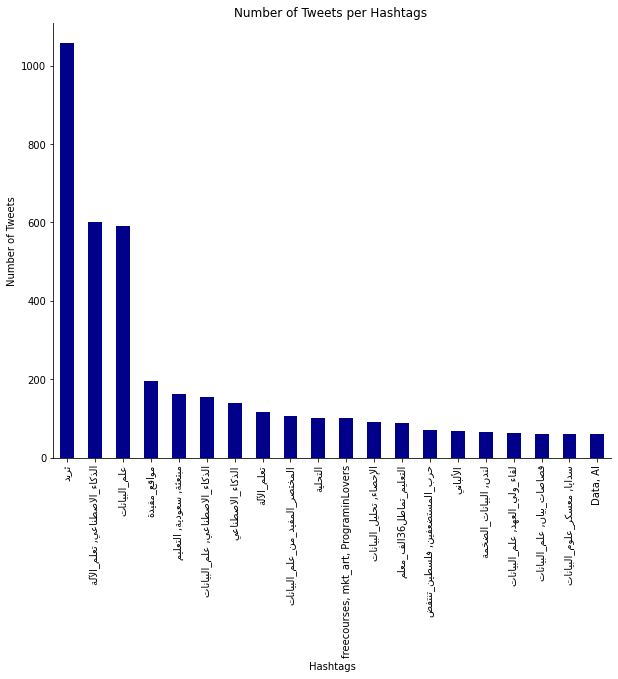

In [ ]:
hashtags['index']=hashtags['index'].apply(arabic_reshaper.reshape).apply(get_display)
# hashtags.sort_values(by='hashtags', ascending=False).nlargest(10).plot(kind='bar',x='index', y='hashtags' , legend=True,align='center',
#                                                           figsize=(10,8))
hashtags.nlargest(20,'hashtags').plot(kind='bar',x='index', y='hashtags' , legend=None,align='center',
                                                          figsize=(10,8),color='darkblue')
plt.title('Number of Tweets per Hashtags ' )
plt.ylabel('Number of Tweets')
plt.xlabel('Hashtags')
sns.despine()

In [ ]:
s=hashtags['index'].to_string()
data = arabic_reshaper.reshape(s)
data = get_display(data)

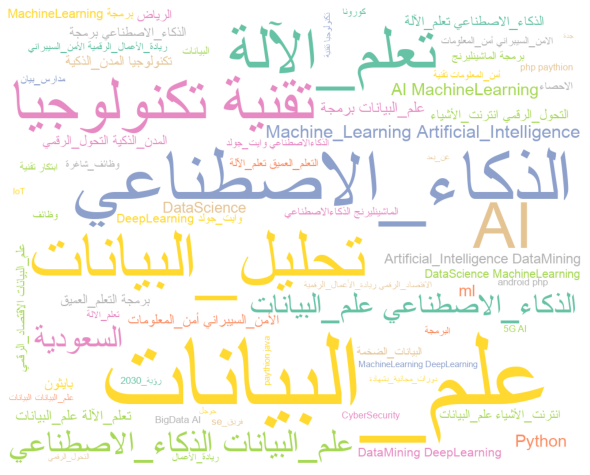

In [ ]:
wordcloud = WordCloud(width = 1000, height = 800,background_color ='white',
                 min_font_size = 15,font_path="/content/gdrive/MyDrive/Arial.ttf",colormap='Set2').generate(s)#,font_path = 'arial.ttf'
  
# # # plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud,interpolation="bilinear")
plt.imshow(wordcloud, )

plt.axis("off")

plt.tight_layout(pad = 0)
  
plt.show()

Data Cleansing (removing duplication and Spam)

In [ ]:
len(df)

22731

In [ ]:
df.columns

Index(['user_id', 'status_id', 'created_at', 'screen_name', 'text', 'source',
       'display_text_width', 'reply_to_status_id', 'reply_to_user_id',
       'reply_to_screen_name',
       ...
       'account_created_at1', 'retweet_created_at1', 'hash_counts',
       'mention_counts', 'word_count', 'char_count', 'avg_char_per_word',
       'stopwords', 'emoji_count', 'hashtag'],
      dtype='object', length=101)

In [ ]:
li=['وظائف','وظيفة'
    ,'وظائف_شاغرة',
    'سبوتنيك_5, روسيا','سؤال_منطقي_لحد_يكفرني'
    ,'وظائف_شاغرة','لوري_شوو','اجتماعيون_ظفار_مهمشون','خصم','إلهي','الإله','#عاجل','لعن_الله_الثورة','مشروع_تخرج','اجتماعيون_ظفار_مهمشون','مشاريع_تخرج','أخبار_الأردن','#القدس']
df=df[~df.hashtags.str.contains('|'.join(li),na=False)]


In [ ]:
df = df.drop(df[df.mention_counts >= 13].index)
df = df.drop(df[df.hash_counts >= 15].index)

In [ ]:
len(df)

22091

Discovering 

In [ ]:
len(df['user_id'].unique())

11259

In [ ]:
print('retweet',len(df.loc[df['is_retweet']==True]))
print('original',len(df.loc[df['is_retweet']==False]))

retweet 17300
original 4791


In [ ]:
original=df[df['is_retweet']==False]
print('max tweet data',original['created_at'].max())
print('min tweet data',original['created_at'].min())

#########################

print('max retweet date',df['retweet_created_at'].max())
print('min retweet date',df['retweet_created_at'].min())

max tweet data 2021-09-15 00:00:00
min tweet data 2021-03-24 09:08:06
max retweet date 2021-09-15 00:00:00
min retweet date 2017-03-18 00:00:00


In [ ]:
df['created_at_hour']=df['created_at'].dt.hour
df['retweet_created_at_hour']=df['retweet_created_at'].dt.hour

In [ ]:
print('max tweet data',df['created_at_hour'].min())
print('min tweet data',df['created_at_hour'].max())

print('max retweet date',df['retweet_created_at_hour'].max())
print('min retweet date',df['retweet_created_at_hour'].min())


max tweet data 0
min tweet data 23
max retweet date 23.0
min retweet date 0.0


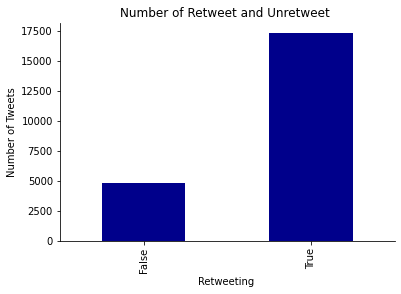

In [ ]:
df.groupby(['is_retweet'])['text'].count().plot(kind='bar',legend=None,color='darkblue')
plt.title('Number of Retweet and Unretweet ')
plt.ylabel('Number of Tweets')
plt.xlabel('Retweeting ')
sns.despine()

In [ ]:
df_qouted=df[df['is_quote']==True]
print('quoted tweets',len(df_qouted))
#replies tweets
df_replies=df[df['reply_to_status_id'].notnull()]
print('replies tweets',len(df_replies))
#original retweetd
df_not=df[df['is_retweet']==False]
original_tweet_df=df_not[(~df_not.status_id.isin(df_replies.status_id))&(~df_not.status_id.isin(df_qouted.status_id))]
print('original tweets',len(original_tweet_df))

#retweet tweets
df_retweet=df[df['is_retweet']==True]
print('retweet tweets',len(df_retweet))


quoted tweets 366
replies tweets 1866
original tweets 2575
retweet tweets 17300


In [ ]:
df.loc[df["retweet_verified"]==1,'retweet_verified']=True
df.loc[df["retweet_verified"]==0,'retweet_verified']=False

Active Users

In [ ]:
count1=df.groupby(['screen_name']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(10)
count1

,screen_name,counts
2350,Fahad_Almsned,356
3363,ML_Tweet_Bot,203
4363,PrograminLovers,147
617,AR5133,107
2021,Dr_Hmood,103
5227,Trends_StatNet,81
1388,AnalystAG,77
1984,DrKhaledUtaibi,74
4323,PYTHON01100100,73
6932,bayan_data,53


In [ ]:
# df.loc[df['screen_name']=='ML_Tweet_Bot']

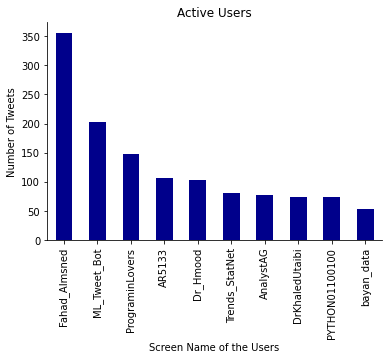

In [ ]:
count1.sort_values(by='counts',ascending=False).plot(kind='bar',x='screen_name', y='counts',color='darkblue',legend=None)
plt.title('Active Users')
plt.ylabel('Number of Tweets')
plt.xlabel('Screen Name of the Users')
sns.despine()

In [ ]:
count1=df.groupby(['screen_name','is_retweet']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(10)
count1

,screen_name,is_retweet,counts
2458,Fahad_Almsned,True,342
3514,ML_Tweet_Bot,True,203
633,AR5133,False,107
4544,PrograminLovers,False,75
4504,PYTHON01100100,True,73
4545,PrograminLovers,True,72
5450,Trends_StatNet,True,71
1442,AnalystAG,False,71
2116,Dr_Hmood,True,68
2075,DrKhaledUtaibi,True,67


In [ ]:
count2=df.groupby(['retweet_screen_name','retweet_status_id']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(10)
count2

,retweet_screen_name,retweet_status_id,counts
1687,khaliidviip,1375945970152800256.000000,660
941,MohanadAlKalash,1386968910847791104.000000,540
903,MariamEmara,1429401527517687808.000000,359
223,AnalystAG,1425363341191651328.000000,293
1519,azsemari,1399625098122825728.000000,227
400,Dr_Gh_Alkhadim,1433194149797322752.000000,221
1790,naif_aiydh,1394366240794230784.000000,205
225,AnalystAG,1425906955575508992.000000,199
1699,khaliidviip,1395045441205686272.000000,195
1818,p_4all,1426156673727705088.000000,190


In [ ]:
count2=df.groupby(['retweet_screen_name'])['retweet_status_id'].count().reset_index(name='counts').sort_values('counts', ascending=False).head(10)
count2

,retweet_screen_name,counts
219,Dr_Hmood,1247
790,khaliidviip,1228
122,AnalystAG,1172
892,researcherbadr,774
389,MohanadAlKalash,540
251,Fahad_Almsned,410
371,MariamEmara,359
869,p_4all,313
853,naif_aiydh,304
930,t3lmprogramming,285


In [ ]:
count2=df.groupby(['retweet_screen_name'])['retweet_status_id'].nunique().reset_index(name='counts').sort_values('counts', ascending=False).head(10)
count2

,retweet_screen_name,counts
219,Dr_Hmood,114
251,Fahad_Almsned,111
39,AR5133,33
939,themis277,31
425,PrograminLovers,29
460,Rwaq,28
892,researcherbadr,25
909,school_bayan,21
407,NajwaGhamdi,19
337,Khulood_Almani,18


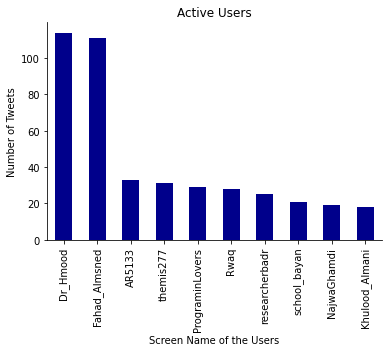

In [ ]:
count2.sort_values(by='counts',ascending=False).plot(kind='bar',x='retweet_screen_name', y='counts',color='darkblue',legend=None)
plt.title('Active Users')
plt.ylabel('Number of Tweets')
plt.xlabel('Screen Name of the Users')
sns.despine()

Verified Accounts

In [ ]:
look=df.loc[df['verified']==True]
print(len(look))
look[['verified','retweet_verified','screen_name','retweet_screen_name']]

347


,verified,retweet_verified,screen_name,retweet_screen_name
316454,True,False,mohamedmsayed,p_4all
312665,True,False,alswaimel,Adel_Alghamdi2
255978,True,NaN,arabhardware,NaN
281600,True,False,AhmadAlGhamd,NajwaGhamdi
275295,True,False,AhmadAlGhamd,NajwaGhamdi
...,...,...,...,...
19291,True,NaN,Arabic_CL,NaN
37920,True,NaN,khaberni,NaN
187259,True,NaN,wadhaef_jobs,NaN
338056,True,NaN,SAlzamam,NaN


In [ ]:
look['retweet_screen_name'].unique()

array(['p_4all', 'Adel_Alghamdi2', nan, 'NajwaGhamdi', '____DT__',
       'injyalqadi', 'Dr_Hmood', 'yahya200947', 'MariamEmara', 'VeSyria',
       'DrHuzam', 'drmrhassan', 'AbdulazizAlbkar', 'DaralsalamShop',
       'KAUST_NewsAR', 'abdullaalbasti', 'admediaoffice', 'bshalash',
       't_alturkestani', 'kkuxedu', 'Alqahtani_khald', 'ahmed_aljabri',
       'Khulood_Almani', 'RaqmnSA', 'Dr_balsoliman', 'SDatanalys',
       'MiskLeadership', 'TaifUniversity', 'alioh', 'leadermr101',
       'AbdullahSahab', 'Dr_Qoradi', 'wadimakkahkn', 'sshrsa',
       'GDSCsaudi', 'aboodalzahim', 'TalibHashem', 'MsTechies',
       'SPAeconomic', 'ALAYAM', 'Investurtime1', 'swcc_ksa', 'DrJamal11',
       'Rwaq', 'JazanCourses', 'mkatouah', 'communitonline',
       'school_bayan', 'FBakhashwain', 'DRCTODAY', 'suliman_Nut',
       'althari', 'ForbesME', 'DevoteamMidEast', 'm_albahly', 'dwratti',
       'free0courses', 'mohaid123', 'SDAIA_SA', 'memeiies', 'AAK_News',
       'KSANews'], dtype=object)

In [ ]:
# df.loc[df['verified']==True]

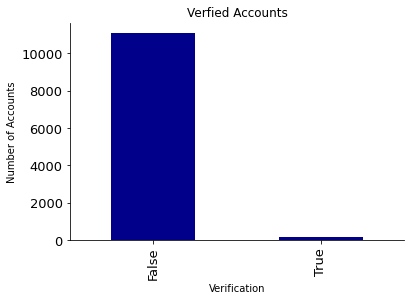

In [ ]:
df.groupby(['verified'])['user_id'].nunique().plot(kind='bar',legend=None,fontsize=13,color='darkblue')
plt.title('Verfied Accounts')
plt.ylabel('Number of Accounts')
plt.xlabel('Verification')
sns.despine()

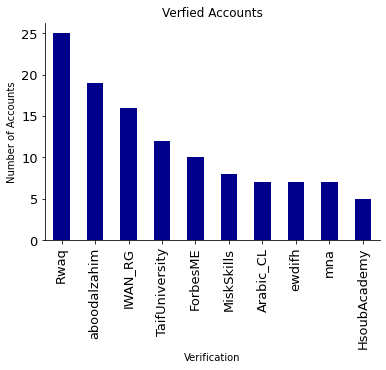

In [ ]:
look.groupby(['screen_name'])['text'].count().nlargest(10).plot(kind='bar',legend=None,fontsize=13,color='darkblue')
plt.title('Verfied Accounts')
plt.ylabel('Number of Accounts')
plt.xlabel('Verification')
sns.despine()

In [ ]:
look.groupby(['screen_name'])['text'].count().nlargest(10)

screen_name
Rwaq              25
aboodalzahim      19
IWAN_RG           16
TaifUniversity    12
ForbesME          10
MiskSkills         8
Arabic_CL          7
ewdifh             7
mna                7
HsoubAcademy       5
Name: text, dtype: int64

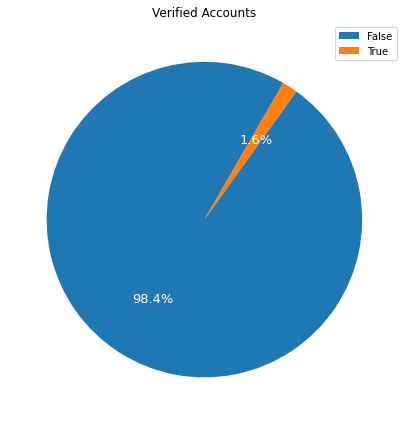

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax=df.groupby(['verified'])['user_id'].count().plot(kind='pie',legend=True,fontsize=13,autopct='%1.1f%%',label='',startangle=60,textprops={'color':"w"})
plt.title('Verified Accounts' )
plt.tight_layout()
sns.despine()


Max and min retweet counts of *tweets*

In [ ]:
min_=df['retweet_count'].min()
# df[df['retweet_count']==min_]

In [ ]:
max_=df['retweet_count'].max()
# df[df['retweet_count']==max_]

In [ ]:
max_

1683

In [ ]:
df.loc[df['retweet_count']==max_]

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favorite_count,retweet_count,quote_count,reply_count,hashtags,symbols,urls_url,urls_t.co,urls_expanded_url,media_url,media_t.co,media_expanded_url,media_type,ext_media_url,ext_media_t.co,ext_media_expanded_url,ext_media_type,mentions_user_id,mentions_screen_name,lang,quoted_status_id,quoted_text,quoted_created_at,quoted_source,quoted_favorite_count,quoted_retweet_count,quoted_user_id,quoted_screen_name,...,place_name,place_full_name,place_type,country,country_code,geo_coords,coords_coords,bbox_coords,status_url,name,location,description,url,protected,followers_count,friends_count,listed_count,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,created_at1,account_created_at1,retweet_created_at1,hash_counts,mention_counts,word_count,char_count,avg_char_per_word,stopwords,emoji_count,hashtag,created_at_hour,retweet_created_at_hour
228561,271844601,1411611583143464960,2021-07-04,ritafattal,كما سيتم منح الإقامة الذهبية للحاصلين على شهادات تخصصية في الذكاء الإصطناعي أو البيانات الضخمة أو علم الأوبئة والفيروسات.. بالإضافة لأوائل الثانوية العامة في الدولة مع أسرهم .. هذه دفعة أولى ستتبعها دفعات .. والعقول والمواهب نريدها أن تبقى وتستمر معنا في مسيرة التنمية والإنجازات,Twitter for iPhone,140,nan,nan,NaN,False,True,0,1683,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,44335525,HHShkMohd,ar,nan,NaN,NaT,NaN,nan,nan,nan,NaN,...,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,https://twitter.com/ritafattal/status/1411611583143464960,Dr.Rita George Alfattal,NaN,"‏‏‏‏‏‏‏‏‏‏‏‏‏‏ماجستير طب الاطفال/ البورد العربي اطفال/ الزمالة الملكية البريطانية في طب \n الاطفال MRCPCH \n\n Love God, life and people",https://t.co/hCta6mcKoM,False,10863,414,42,8094,3275,2011-03-25 09:00:11,False,https://t.co/hCta6mcKoM,https://www.youtube.com/channel/UCvvGHeTEOnhhJVy0DMPoUHg,nan,https://pbs.twimg.com/profile_banners/271844601/1444331337,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/957346544612773888/aT08ooCn_normal.jpg,2021-07-04,2011-03-25,2020-11-15,1,1,45,279,5.222222,11,0,[],0,0.000000
156065,896844109968801792,1398777910891364354,2021-05-29,p_t_science,إذا فقدت ملفات هامّة من جهازك الكمبيوتر؛ فهذا برنامج مميز ومجاني لاستعادة الملفات في وقت سريع!\nفقط تشغل خيار البحث وراح يسترجع لك الكثير من الملفات المفقودة:\nhttps://t.co/uu4jAyTMDn\n\nبرنامج ثاني مفيد كذلك:\nhttps://t.co/r9GIQnhQa4 https://t.co/sIxx4h7v80,Twitter for iPhone,140,nan,nan,NaN,False,True,0,1683,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,18967802,Abdulaziz_Hmadi,ar,nan,NaN,NaT,NaN,nan,nan,nan,NaN,...,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,https://twitter.com/p_t_science/status/1398777910891364354,#العلوم_الطبيعية 🐋 🌧,من الفوتونات حتى المجرات,بين إلهام #العلوم_الطبيعية وسحر #اللغة_العربية #أنا_أحب_العلوم باليقين يدري كل ذي لب سليم أنه لايكون الطلب إلا بسماع وقراءة وكتاب #ابن_حزم وماتوفيقي إلابالله|🌦,NaN,False,1255,292,3,23474,20767,2017-08-13 21:21:13,False,NaN,NaN,nan,https://pbs.twimg.com/profile_banners/896844109968801792/1609978014,NaN,http://pbs.twimg.com/profile_images/1326239612709335051/gLDZ5JGX_normal.jpg,2021-05-29,2017-08-13,2021-05-29,1,1,30,253,6.441176,6,0,[],0,20.000000


Max and min favourit counts of *tweets*

In [ ]:
min_=df['retweet_favorite_count'].min()
# df[df['retweet_favorite_count']==min_]

In [ ]:
max_=df['retweet_favorite_count'].max()
# df[df['retweet_favorite_count']==max_]

In [ ]:
max_

9548.0

In [ ]:
df.loc[df['retweet_favorite_count']==max_]

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favorite_count,retweet_count,quote_count,reply_count,hashtags,symbols,urls_url,urls_t.co,urls_expanded_url,media_url,media_t.co,media_expanded_url,media_type,ext_media_url,ext_media_t.co,ext_media_expanded_url,ext_media_type,mentions_user_id,mentions_screen_name,lang,quoted_status_id,quoted_text,quoted_created_at,quoted_source,quoted_favorite_count,quoted_retweet_count,quoted_user_id,quoted_screen_name,...,place_name,place_full_name,place_type,country,country_code,geo_coords,coords_coords,bbox_coords,status_url,name,location,description,url,protected,followers_count,friends_count,listed_count,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,created_at1,account_created_at1,retweet_created_at1,hash_counts,mention_counts,word_count,char_count,avg_char_per_word,stopwords,emoji_count,hashtag,created_at_hour,retweet_created_at_hour
241202,1258039425898106880,1415609498266374145,2021-07-15,N99RA_,كما سيتم منح الإقامة الذهبية للحاصلين على شهادات تخصصية في الذكاء الإصطناعي أو البيانات الضخمة أو علم الأوبئة والفيروسات.. بالإضافة لأوائل الثانوية العامة في الدولة مع أسرهم .. هذه دفعة أولى ستتبعها دفعات .. والعقول والمواهب نريدها أن تبقى وتستمر معنا في مسيرة التنمية والإنجازات,Twitter for iPhone,140,nan,nan,NaN,False,True,0,1682,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,44335525,HHShkMohd,ar,nan,NaN,NaT,NaN,nan,nan,nan,NaN,...,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,https://twitter.com/N99RA_/status/1415609498266374145,❁ ηơơяа ❁,United Arab Emirates,‏اللهم إني أعوذ بك من زوال نعمتك وفُجاءة نقمتك وتحوُّل عافيتك وجميع سخطك 🌺❤️,NaN,False,408,178,0,26973,699,2020-05-06 14:22:38,False,NaN,NaN,nan,https://pbs.twimg.com/profile_banners/1258039425898106880/1617527141,NaN,http://pbs.twimg.com/profile_images/1413772666654298113/OCWGj2o__normal.jpg,2021-07-15,2020-05-06,2020-11-15,1,1,45,279,5.222222,11,0,[],0,0.000000


Active(Replies)

In [ ]:
r_all=df.groupby(['reply_to_screen_name','text'])['status_id'].count().nlargest(10)
r_all1 = r_all.to_frame().reset_index()
r_all1

,reply_to_screen_name,text,status_id
0,najd_institutes,@najd_institutes هو أحد تخصصات علوم الحاسب الالي وهوالعلم الذي يهتم بقدرة الآلة على تعلم وفهم الأشياء لحل المشاكل واتخاذ القرار مثل الانسان . وهناك العديد من التقنيات التي يتم استخدامها\n#مسابقة_معاهد_نجد_الرمضانيه,6
1,frenchPress001,@frenchPress001 متخيلة شو رح يعمل فينا هالروبوت بعد هالتراوما و شوية machine learning,4
2,Alansaricodez,2- علم البيانات:\nينقسم الى العديد من المجالات منها\n\n تحليل البيانات والبيانات الضخمة\n\n ويعرف انه استخدام جميع الوسائل التقنية والخوارزميات لحل مشكلة وتفسير ظواهر بالاستعانة بعلوم اخرى كالرياضيات ونظم المعلومات والاحصاء وغيرها. https://t.co/6qcrSG01e7,3
3,Alansaricodez,"اللغات والمهارات المستخدمة في علم البيانات:\npython, الاحصاء \n\nبعض مكتبات بايثون المستخدمة في علم البيانات:\nnumpy، pandas، scikit-learn، matplotlib، seaborn و Scipy",3
4,Alansaricodez,مصادر:\nدليل التخصصات:\nhttps://t.co/pIFKtAUiZI\n\nالامن السيبراني وعلاقته بالبرمجة:\nhttps://t.co/B0ufkpgpoU\n\nافضل لغات برمجة تطبيقات الذكاء الاصطناعي:\nhttps://t.co/vVdmld8fAS https://t.co/Q7nai1qOvu,3
5,Almajlliss,@Almajlliss برنامج ليس موجود بالواقع ، وعباره عن عالم افتراضي وحتى لم يحتاج اي مواد او قطع ه لانتاجه ، ولا يحتاج صيانه دوريه ، والغريب انه يباع بمبلغ 4 مليار دولار ، برنامج ( مجاني ) وخالي من الاعلانات ، كل مافي الامر هو سرقه بيانات المشتركين ، ،،، هل يوجد اي افتراض غير هذا,3
6,AnalystAG,الولايات المتحدة الأمريكية (الولايات المتحدة الأمريكية)\n\n متوسط ​​الراتب الأساسي لعلماء البيانات في الولايات المتحدة هو 120،089 دولارًا. في المقابل ، متوسط ​​الراتب الأساسي لمهندس تعلم الآلة في الولايات المتحدة هو 150،660 دولارًا أمريكيًا.,3
7,AnalystAG,تتكون عملية علم البيانات من 5 مراحل رئيسية\n\n المرحلة 1: فهم مشكلة العمل\n\n المرحلة 2: جمع البيانات\n\n المرحلة 3: تنظيف البيانات واستكشافها\n\n المرحلة 4: نموذج البناء\n\n المرحلة الخامسة: توصيل الرؤى وتصورها,3
8,AnalystAG,وفقًا لـ Glassdoor ، متوسط ​​الراتب لعلماء البيانات في المملكة المتحدة هو 46،818 جنيهًا إسترلينيًا. تشير prospects إلى أن متوسط ​​الراتب لمهندس تعلم الآلة في المملكة المتحدة هو 52000 جنيه إسترليني,3
9,AnalystAG,يمكن لعلماء البيانات المبتدئين أن يتوقعوا أن يبدأوا في حدود 25000 جنيه إسترليني - 30 ألف جنيه إسترليني (قد يرتفع إلى 40 ألف جنيه إسترليني اعتمادًا على الخبرة) يمكن لخريج تعلم الآلة أو مهندس التعلم الآلي أن يتوقع راتبًا يبدأ من 35000 جنيه إسترليني - 40.000 جنيه إسترليني.,3


In [ ]:
r_all=df.groupby(['reply_to_screen_name','text','screen_name','status_url'])['status_id'].count().nlargest(10)
r_all1 = r_all.to_frame().reset_index()
r_all1

,reply_to_screen_name,text,screen_name,status_url,status_id
0,Alansaricodez,2- علم البيانات:\nينقسم الى العديد من المجالات منها\n\n تحليل البيانات والبيانات الضخمة\n\n ويعرف انه استخدام جميع الوسائل التقنية والخوارزميات لحل مشكلة وتفسير ظواهر بالاستعانة بعلوم اخرى كالرياضيات ونظم المعلومات والاحصاء وغيرها. https://t.co/6qcrSG01e7,Alansaricodez,https://twitter.com/Alansaricodez/status/1416416806647091204,3
1,Alansaricodez,"اللغات والمهارات المستخدمة في علم البيانات:\npython, الاحصاء \n\nبعض مكتبات بايثون المستخدمة في علم البيانات:\nnumpy، pandas، scikit-learn، matplotlib، seaborn و Scipy",Alansaricodez,https://twitter.com/Alansaricodez/status/1416416810015014913,3
2,Alansaricodez,مصادر:\nدليل التخصصات:\nhttps://t.co/pIFKtAUiZI\n\nالامن السيبراني وعلاقته بالبرمجة:\nhttps://t.co/B0ufkpgpoU\n\nافضل لغات برمجة تطبيقات الذكاء الاصطناعي:\nhttps://t.co/vVdmld8fAS https://t.co/Q7nai1qOvu,Alansaricodez,https://twitter.com/Alansaricodez/status/1416416838645424128,3
3,Almajlliss,@Almajlliss برنامج ليس موجود بالواقع ، وعباره عن عالم افتراضي وحتى لم يحتاج اي مواد او قطع ه لانتاجه ، ولا يحتاج صيانه دوريه ، والغريب انه يباع بمبلغ 4 مليار دولار ، برنامج ( مجاني ) وخالي من الاعلانات ، كل مافي الامر هو سرقه بيانات المشتركين ، ،،، هل يوجد اي افتراض غير هذا,nextkuw,https://twitter.com/nextkuw/status/1380898162223759369,3
4,AnalystAG,الولايات المتحدة الأمريكية (الولايات المتحدة الأمريكية)\n\n متوسط ​​الراتب الأساسي لعلماء البيانات في الولايات المتحدة هو 120،089 دولارًا. في المقابل ، متوسط ​​الراتب الأساسي لمهندس تعلم الآلة في الولايات المتحدة هو 150،660 دولارًا أمريكيًا.,AnalystAG,https://twitter.com/AnalystAG/status/1425907010369953792,3
5,AnalystAG,تتكون عملية علم البيانات من 5 مراحل رئيسية\n\n المرحلة 1: فهم مشكلة العمل\n\n المرحلة 2: جمع البيانات\n\n المرحلة 3: تنظيف البيانات واستكشافها\n\n المرحلة 4: نموذج البناء\n\n المرحلة الخامسة: توصيل الرؤى وتصورها,AnalystAG,https://twitter.com/AnalystAG/status/1425906975330775046,3
6,AnalystAG,وفقًا لـ Glassdoor ، متوسط ​​الراتب لعلماء البيانات في المملكة المتحدة هو 46،818 جنيهًا إسترلينيًا. تشير prospects إلى أن متوسط ​​الراتب لمهندس تعلم الآلة في المملكة المتحدة هو 52000 جنيه إسترليني,AnalystAG,https://twitter.com/AnalystAG/status/1425907006200745985,3
7,AnalystAG,يمكن لعلماء البيانات المبتدئين أن يتوقعوا أن يبدأوا في حدود 25000 جنيه إسترليني - 30 ألف جنيه إسترليني (قد يرتفع إلى 40 ألف جنيه إسترليني اعتمادًا على الخبرة) يمكن لخريج تعلم الآلة أو مهندس التعلم الآلي أن يتوقع راتبًا يبدأ من 35000 جنيه إسترليني - 40.000 جنيه إسترليني.,AnalystAG,https://twitter.com/AnalystAG/status/1425907004204269572,3
8,Dr_Hmood,@Dr_Hmood السلام عليكم\nشنو استفيد من برمجه الويب مع علم البيانات,snforever1,https://twitter.com/snforever1/status/1410002982289219585,3
9,II_I_Il,- برنامج علم البيانات\n- لغة إنجليزية\n- يوجد شهادة\n- ينتهي التسجيل في 24 اغسطس ( غدًا )\n- https://t.co/1qvzXUyN3B https://t.co/4r7xYlsOdj,II_I_Il,https://twitter.com/II_I_Il/status/1429624191905566725,3


In [ ]:
r_all=df.groupby(['reply_to_screen_name'])['text'].count().nlargest(10)
r_all1 = r_all.to_frame().reset_index()
r_all1

,reply_to_screen_name,text
0,PrograminLovers,95
1,AnalystAG,59
2,Dr_Hmood,29
3,series_data,22
4,Jaber_Al_Shehri,17
5,khaliidviip,16
6,DataQassim,15
7,arab_coding,15
8,Turadi_7,13
9,AlhumudMona,12


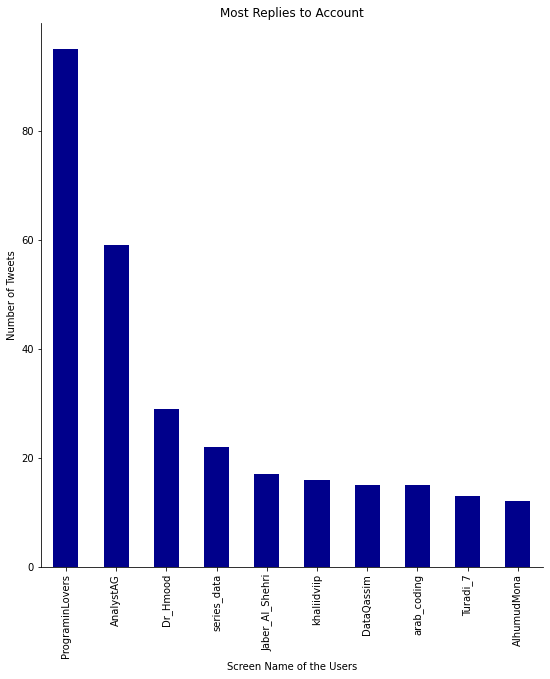

In [ ]:
r_all1.plot(kind='bar',x='reply_to_screen_name', y='text',figsize=(9,10),legend=None,color='darkblue')
plt.title('Most Replies to Account')
plt.ylabel('Number of Tweets')
plt.xlabel('Screen Name of the Users')
#plt.yticks(np.arange(0,max_+2 , 2))
sns.despine()

In [ ]:
r_all=df.groupby(['reply_to_screen_name'])['text'].count().nsmallest(10)
r_all1 = r_all.to_frame().reset_index()
r_all1

,reply_to_screen_name,text
0,0x0636,1
1,1DeDios13_,1
2,1Yore,1
3,1mokm,1
4,2016khald,1
5,21pigeons,1
6,2leefr1,1
7,2uTUSta0CRrXoVY,1
8,3Vf4YvTfPLCYf6Z,1
9,3bdla_reda,1


Active(Qouted)

In [ ]:
quo_=df.groupby(['quoted_text'])['user_id'].count()
quo_1 = quo_.to_frame().reset_index()
quo_1

,quoted_text,user_id
0,"""#دبي الذكية"" و""#محمد_بن_راشد للطب"" تطوران نموذجاً جديدا للرصد الوبائي لـ ""#كوفيد19"" \n#وام \nhttps://t.co/pHhNjK71w4 https://t.co/KrwA7vtaS6",1
1,"""Hundreds of studies flooded onto preprint servers &amp; into medical journals claiming to demonstrate AI’s ability,\nMany months later a research team from the University of Cambridge reached different conclusion: Every single one was fatally flawed ! ""\n #AI https://t.co/gDVCgpGP1y",1
2,"""Introduction to Deep Learning -- 170 Video Lectures from 𝐀daptive Linear Neurons to 𝐙ero-shot Classification with Transformers"" \nJust organized all DL-related videos I recorded in 2021. Hoping it might be useful for one or the other person out there:\nhttps://t.co/8FhMfL6v3N",1
3,"""استخدامات #علم_البيانات في #الموارد_البشرية موضوع اللقاء الشهري التاسع لـ""#بشر""\nمع د.خالد القحطاني\n.\n💬💻اللقاء(عن بُعد)ومجاناً\n📃🔰يوجد شهادة حضور\n🕰الأربعاء 4-8 الساعة الـ9 م\nوتأتي هذه المبادرة انطلاقًا من حرص الجمعية على تحقيق أهداف #رؤية_2030\nللتسجيل:\nhttps://t.co/g5FwXsBE80 https://t.co/4IynJ448C4",1
4,"""التشيك بطل أوروبا""\n\nشركة سبورت رادار إحدى عمالقة البيانات الرياضية، لديها تطبيق ذكاء اصطناعي يتوقع المباريات بناء على الاحصائيات والبيانات .. ما زال هذا التطبيق يؤمن بأن جمهورية التشيك ستفوز بأمم أوروبا.\n\nاليوم هذا التوقع لديه اختبار حقيقي .. أمام هولندا! https://t.co/Xvk6oMzsuj",1
...,...,...
259,"📢 Last Call! This weekend is your last chance to sign up for the beginner-friendly #30daysofML – the event starts Monday, August 2.\n\nhttps://t.co/GtjvV9WJ4m https://t.co/mmlihu30jc",1
260,📣📣📣\n\nأصدقاء فريق (LEK) 🤩✨ \nيسرنا ان نعلن لكم عن إقامة دورة :\n( تطبيق #تحليل_البيانات بإستخدام #SPSS )\n\n1️⃣ المستوى الأول\n2️⃣ المستوى الثاني\n\nتقديم المدرب المتميز ✨:\nد. محمد غريب \n\n-رسوم المستويين 💸 :\n(٢٤٩) ريال فقط 🔥\n\n- للإستفسار والتسجيل 📝:\nhttps://t.co/wJxo0gxzDK https://t.co/rCLWb8cKY3,1
261,"🚀 You're invited to our super fun, beginner-friendly learning challenge, #30daysofML. First 2 weeks: rapidly cover essential machine learning skills. Last 2 weeks: join others in an invite-only, low pressure Kaggle competition. Sign up now, starts Aug 2! https://t.co/ydmrocGXss https://t.co/mLhELyKuZb",1
262,🥳Tomorrow is the day! The Hugging Face course first four chapters will be released by tomorrow.\n\nSign up to our newsletter to receive a notification when it's out https://t.co/O2BN6nth3I\n\nFinal sneak peek: learn how navigate the Hub with @LysandreJik: \n\nhttps://t.co/E90O9HPL8y,1


In [ ]:
quo_=df.groupby(['text'])['quoted_text'].count().nlargest(10)
quo_1 = quo_.to_frame().reset_index()
quo_1

,text,quoted_text
0,#ثريد بعنوان : تعلم الآلة وعلاقته بالذكاء الاصطناعي \n\n- بواسطة / @naif_aiydh 📜 https://t.co/ShGAggDEDr,3
1,١٠٠+ كتاب مجاني في مجال علم البيانات https://t.co/u4DOjSmY5y,3
2,🔸تخصصي علم الوبائيات والإحصاء الطبي، أحب فيه التنوع وربط البيانات بالمعنى وانه الفائدة فيه بتعم على المجتمع، وانه متجدد يخليني دائما اتعلم. https://t.co/SAcFamlLJj,3
3,"""علم الإحصاء جزء مهم من منظومة علم البيانات ""👏🏻👏🏻\n#إحصائي_يطالب_بحقه https://t.co/BL1bkEkpRx",2
4,#دورة_تدريبية عن تحليل البيانات باستخدام برنامج الاكسل\nمقدمة من منصة #مدارس_بيان \nمرفق لكم معلومات التسجيل \n#التعليم_عن_بعد #البحث_العلمي #الدراسات_العليا #الاحصاء #علم_البيانات #الذكاء_الاصطناعي #رؤية_السعودية_2030 https://t.co/EmFiIhTyDz,2
5,#علم_البيانات #تحليل_البيانات #الذكاء_الاصطناعي #تعلم_الآلة من اكثر التخصصات طلبا في سوق العمل ويزيد عليها الطلب مستقبلا ليس فقط لندرة المتخصصين فيه ولكن لقلة من يتقنه ويتفوق فيه وكثرة الدخلاء. https://t.co/tVyK8v51kd,2
6,#مدخل الى تعلم #لغة #الآلة #مجانا #دورات_اونلاين #دورات_مجانية https://t.co/gnDx9gnl20,2
7,#يحدث_الآن |\n\nبدء فعاليات المؤتمر الدُّولي للسَّيدات في علم البيانات تحت رعاية سعادة رئيس الجامعة أ.د. يوسف عسيري.\n\nللحضور: https://t.co/sKXsfTyLKT\n\n#جامعة_الطائف_التي_نريد\n#كيف_نكون_قدوة https://t.co/Yvc9W8y696,2
8,10 وظائف سيزداد الطلب عليها في المستقبل:\n1) أخصائي ذكاء اصطناعي\n2) هندسة الروبوتات\n3) عالم بيانات\n4) مهندس برمجة الويب المتكامل\n5) مهندس موثوقية الموقع\n6) أخصائي نجاح تجربة العملاء\n7) مسؤول تطوير المبيعات\n8) هندسة البيانات\n9) متخصص الصحة السلوكية\n 10) أخصائي الأمن السيبراني. https://t.co/8uLPp4rmwo,2
9,100 كتاب مجاني في علم البيانات https://t.co/w3QeYpVcZe,2


In [ ]:
quo_=df.groupby(['text','quoted_text','quoted_screen_name','screen_name','status_url'])['user_id'].count().nlargest(10)
quo_1 = quo_.to_frame().reset_index()
quo_1

,text,quoted_text,quoted_screen_name,screen_name,status_url,user_id
0,#ثريد بعنوان : تعلم الآلة وعلاقته بالذكاء الاصطناعي \n\n- بواسطة / @naif_aiydh 📜 https://t.co/ShGAggDEDr,"ثريد عن تعلم الآلة وعلاقته بالذكاء الاصطناعي ودورة تدريبية مجانية مقدمة من قوقل لتعلم الآلة 👇🏼\n\nهي أحد فروع الذكاء الاصطناعي التي تهتم بتصميم وتطوير خوارزميات وتقنيات تسمح للحواسيب بامتلاك خاصية التعلم وتستخدم خوارزميات التعلم الآلي, للعثور على الأنماط ضمن كميات ضخمة من البيانات https://t.co/fad6gdjIfj",naif_aiydh,threadTQ,https://twitter.com/threadTQ/status/1394663028130557953,3
1,١٠٠+ كتاب مجاني في مجال علم البيانات https://t.co/u4DOjSmY5y,100+ free data science books: https://t.co/iSNHcJ57iI\n\ncredit: @marcusborba https://t.co/VY9de8DmRZ,MIT_CSAIL,AnasBafaqeeh,https://twitter.com/AnasBafaqeeh/status/1425400001929302019,3
2,🔸تخصصي علم الوبائيات والإحصاء الطبي، أحب فيه التنوع وربط البيانات بالمعنى وانه الفائدة فيه بتعم على المجتمع، وانه متجدد يخليني دائما اتعلم. https://t.co/SAcFamlLJj,اعمل اقتباس 🌷\nقول تخصصك وحاجة تحبها فيه والسبب ✅\n.\n.\nتخصصي أحياء عامة أحب الميتوكندريا\n لأنها مصنع الطاقة في أجسامنا ⚡️💡 https://t.co/Zz9YlwneUu,moh_biraqdar,AreejFattani,https://twitter.com/AreejFattani/status/1427175270973313032,3
3,"""علم الإحصاء جزء مهم من منظومة علم البيانات ""👏🏻👏🏻\n#إحصائي_يطالب_بحقه https://t.co/BL1bkEkpRx",@ImanAlhasani اعتقد علم #الاحصاء يدخل بقوة ضمن #الثورة_الصناعية_الرابعة. فالذكاء الصناعي وتعلم الآلة يعتمد كثيرا على أدوات التحليل الاحصائي وتحاليل الانحدار المختلفة. علم الاحصاء جزء مهم من منظومة علم البيانات #DataScience. الاحصائيون مورد بشري مهم في المرحلة القادمة من مسيرة عُمان.,aallawati1,Blue__i911,https://twitter.com/Blue__i911/status/1410866153354846214,2
4,#دورة_تدريبية عن تحليل البيانات باستخدام برنامج الاكسل\nمقدمة من منصة #مدارس_بيان \nمرفق لكم معلومات التسجيل \n#التعليم_عن_بعد #البحث_العلمي #الدراسات_العليا #الاحصاء #علم_البيانات #الذكاء_الاصطناعي #رؤية_السعودية_2030 https://t.co/EmFiIhTyDz,الوظائف الأكثر طلبا خلال الخمس سنين القادمة راح تكون في مجالات #علم_البيانات و #الذكاء_الاصطناعي بحسب توقعات مواقع التوظيف العالمية.\n\nسابق الزمن وسجل الآن💫\nhttps://t.co/cVzrShyCWd\n\nللتسجيل لدورة #الإحصاء و #البايثون📌\nhttps://t.co/ZiyickFfvl\n\n#الإكسل #تحليل_البيانات https://t.co/MO8o4yzsh6,school_bayan,Trends_StatNet,https://twitter.com/Trends_StatNet/status/1404151312317562880,2
5,#علم_البيانات #تحليل_البيانات #الذكاء_الاصطناعي #تعلم_الآلة من اكثر التخصصات طلبا في سوق العمل ويزيد عليها الطلب مستقبلا ليس فقط لندرة المتخصصين فيه ولكن لقلة من يتقنه ويتفوق فيه وكثرة الدخلاء. https://t.co/tVyK8v51kd,Two of the most in-demand areas of expertise for job seekers:\n1️⃣ data analysis &amp; science \n2️⃣AI &amp; machine learning \n#DataScience \n#AI #MachineLearning https://t.co/KsbMsV3KLe,hanan_M_GH2000,hanan_M_GH2000,https://twitter.com/hanan_M_GH2000/status/1403234267203842049,2
6,#مدخل الى تعلم #لغة #الآلة #مجانا #دورات_اونلاين #دورات_مجانية https://t.co/gnDx9gnl20,#دورات_مجانيه #بس_حبيت_اعلمك\n#صباح_الخير \nجمعية الحاسب تستمر في تقديم دوراتها المجانية \nدورة مدخل إلى تعلم لغة الآلة\nللمدرب د. فهد العوفي\nالاحد 7/1/1443\n15/8/2021-18/8/2021\n\nللتسجيل( يتطلب منك التسجيل في الموقع )\n\nhttps://t.co/ifbHXFP6rl https://t.co/S5JbnFPUqX,leadermr101,lab65178613,https://twitter.com/lab65178613/status/1423915583788265475,2
7,#يحدث_الآن |\n\nبدء فعاليات المؤتمر الدُّولي للسَّيدات في علم البيانات تحت رعاية سعادة رئيس الجامعة أ.د. يوسف عسيري.\n\nللحضور: https://t.co/sKXsfTyLKT\n\n#جامعة_الطائف_التي_نريد\n#كيف_نكون_قدوة https://t.co/Yvc9W8y696,#إعلان |\n\nتدعوكم #جامعة_الطائف لحضور المؤتمر الدولي للسيدات في #علم_البيانات الذي يضم نخبة من المتحدثات، الأكاديميات، والمهتمات بعلم البيانات في جميع التخصصات.\n\nموعد التسجيل سيكون في اليوم الأول للمؤتمر 30 مارس 2021م\n\nالساعة:10:30 صباحًا\n\nللتسجيل والحضور: https://t.co/sKXsfTyLKT https://t.co/dbZ44CY2r8,TaifUniversity,TaifUniversity,https://twitter.com/TaifUniversity/status/1376798782319435778,2
8,10 وظائف سيزداد الطلب عليها في المستقبل:\n1) أخصائي ذكاء اصطناعي\n2) هندسة الروبوتات\n3) عالم بيانات\n4) مه

In [ ]:
quo_=df.groupby(['quoted_screen_name','text','screen_name'])['user_id'].count().nlargest(10)
quo_1 = quo_.to_frame().reset_index()
quo_1

,quoted_screen_name,text,screen_name,user_id
0,MIT_CSAIL,١٠٠+ كتاب مجاني في مجال علم البيانات https://t.co/u4DOjSmY5y,AnasBafaqeeh,3
1,moh_biraqdar,🔸تخصصي علم الوبائيات والإحصاء الطبي، أحب فيه التنوع وربط البيانات بالمعنى وانه الفائدة فيه بتعم على المجتمع، وانه متجدد يخليني دائما اتعلم. https://t.co/SAcFamlLJj,AreejFattani,3
2,naif_aiydh,#ثريد بعنوان : تعلم الآلة وعلاقته بالذكاء الاصطناعي \n\n- بواسطة / @naif_aiydh 📜 https://t.co/ShGAggDEDr,threadTQ,3
3,221B_ELEMENTARY,"حتى شرلوك هولمز آمن مُبكرا بأهمية البيانات وأنه لا يمكن أن يفعل شيئاً بدونها.\n\nيقول في إحدى القصص: ""أحتاج إلى بيانات. أحتاج إلى الكثير منها."" \n\nونفس هذه الجملة يكررها عالم البيانات في كل يوم عمل.\n\n #إبداع_جامعة_البترول https://t.co/cS5AYuiZXh",yosais,2
4,7Alsabe,هذي الميزة هي وجبة دسمة لاي متخصص في علم البيانات بمجال NLP معالجة النصوص واللغات الطبيعية، بل هو تحدي صعب وبالاخص على وجه التحديد معالجة وتحليل اللغة العربية بسبب تعدد لهجاتها على شتى البلدان، شي عظيم بلا شك لاي مهتم في علم البيانات على وجه العموم. 👏🏻 https://t.co/fh7YV8wwzS,Besheryaghmoor,2
5,A_K_Nain,حتى العلم يتأثر ب الصورة الخاطئة الي ينشرها البعض ادعاءً منهم بالخبرة والمعرفة.\nتعلم الآلة تخصص علمي ليس بسهل ولا يمكن اكتساب مهاراته من كورس او كورسين بدون تعمق وفهم وتطبيق.\n#MachineLearning https://t.co/QnmooWEgSI,afra_rstat,2
6,AlmajlisChannel,"اهنئ زميلاتي و رائدات التقنية في دولة الكويت الشقيقة نجاح برنامج تدريب طالبات الثانوية على مهارات علم البيانات و الذكاء الاصطناعي و المنظم تحت مظلة فعالية ""المرأة في علم البيانات"" إذ كان له التأثير الإيجابي في استقطاب اهتمام طالبات و طلاب الثانوي. \n\nبوركت الجهود 🙏🏻✨ https://t.co/IEqjCr7Q2Z https://t.co/UFOKbafvBj",FarahBeyabe,2
7,Altaheah,الان على السناب شات تشاركنا الاخت نوال @DSNawal بالتعريف بتخصص علم البيانات ، لا يفوتكم قبل تروح السنابات 👌🏻. https://t.co/YC9B0rXV8J,Altaheah,2
8,AmbChenWeiqing,المملكة اليوم بعد اهداف الرؤية وعمل سدايا انتحت لنا برامج وتطبيقات ساهمت في عدة مجالات صحية و امنية لترتقي مع اهم الدول في علم البيانات ممثلة بالصين https://t.co/6ERWs4uvRQ https://t.co/sr9dPUcPax,faahdial,2
9,AmmarElamin,بعدين الساعة 11:45 \nحيكون معانا عبدالرحيم Designer من دبي، ومرغني MSc.Machine Learning من UK\nكان مفروض نبدا 2:00 صباحا لكن اختلاف المناطق مع فرق الزمن دا هو الخلانا نبدا بدري وجاب التوقيت الغريب دا، بالاضافة للناس البتمشي التهجد https://t.co/0XEobdQ5vO,AmmarElamin,2


In [ ]:
df.loc[df['quoted_screen_name']=='GDSCsaudi']

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favorite_count,retweet_count,quote_count,reply_count,hashtags,symbols,urls_url,urls_t.co,urls_expanded_url,media_url,media_t.co,media_expanded_url,media_type,ext_media_url,ext_media_t.co,ext_media_expanded_url,ext_media_type,mentions_user_id,mentions_screen_name,lang,quoted_status_id,quoted_text,quoted_created_at,quoted_source,quoted_favorite_count,quoted_retweet_count,quoted_user_id,quoted_screen_name,...,place_name,place_full_name,place_type,country,country_code,geo_coords,coords_coords,bbox_coords,status_url,name,location,description,url,protected,followers_count,friends_count,listed_count,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,created_at1,account_created_at1,retweet_created_at1,hash_counts,mention_counts,word_count,char_count,avg_char_per_word,stopwords,emoji_count,hashtag,created_at_hour,retweet_created_at_hour
368063,1408408538360205316,1438138566132080653,2021-09-15,GDSCKFU,ونكمل في محطات معسكر تعلم الآلة المقدم من أندية Google للطلبة المطورين 🥳\n\nلا تفوتون فرصة الحضور مواضيع شيقة ومهمه واليوم موضوعنا بيكون عن البايثون واستعمالاتها في تعلم الآله 🤩\n\nواكيد وزي ماعودناكم راح يكون فيه شهادة تنتظرك نهاية هذي الورشة 📃 https://t.co/abysxnCBQb,Twitter for Android,241,nan,nan,NaN,True,False,0,1,nan,nan,NaN,NaN,twitter.com/GDSCsaudi/stat…,https://t.co/abysxnCBQb,https://twitter.com/GDSCsaudi/status/1438099320276934656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,ar,1438099320276934656.000000,1️⃣ الجلسة الثانية في معسكر تعلم الآلة:\n\n▫️مقدمة في بايثون واستعمالاتها في تعلم الآلة▫️\n\n📅 الأربعاء، 2021/09/15م\n⏰ 7:30م - 9:30م\n📍عبر منصة zoom\n🎙️م. منذر الرضي\n📩 سيصلك تأكيد التسجيل ورابط الحضور عبر البريد الإلكتروني https://t.co/CYwWEcNJya,2021-09-15 14:16:11,Twitter for iPhone,19.000000,10.000000,1245082431255789568.000000,GDSCsaudi,...,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,https://twitter.com/GDSCKFU/status/1438138566132080653,GDSC | KFU,"الاحساء, المملكة العربية السعو",‏‏نادي الطلبة المطورين في جامعة الملك فيصل ‎‎@KFUniversity بدعم رسمي من ‎‎@google || نهدف الى نشر المعرفة التقنية في المجتمع الجامعي,NaN,False,293,16,0,55,39,2021-06-25 12:56:25,False,NaN,NaN,nan,https://pbs.twimg.com/profile_banners/1408408538360205316/1629667664,NaN,http://pbs.twimg.com/profile_images/1429559007421870104/Rehnl89v_normal.jpg,2021-09-15,2021-06-25,NaT,1,1,41,265,5.139535,8,3,[],0,nan
367733,1408408538360205316,1437756840666927109,2021-09-14,GDSCKFU,اليوم راح تبدأ اولى معسكرات نادي Google للطلبة المطورين 🥳\n\nمعسكر تعلم الآلة\n\nلا تفوتون فرصة الحضور برحله تبدأ من الصفر إلى مراحل متقدمه مع خبراء في هذا المجال 🤩 \n\nوايضا اكيد بيكون فيه شهادة تنتظرك نهاية كل ورشة تخلصها 📃 https://t.co/fwr8LWqE7z,Twitter for Android,219,nan,nan,NaN,True,False,3,2,nan,nan,NaN,NaN,twitter.com/GDSCsaudi/stat…,https://t.co/fwr8LWqE7z,https://twitter.com/GDSCsaudi/status/1437703414088077316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,ar,1437703414088077056.000000,1️⃣ الجلسة الأولى في معسكر تعلم الآلة:\n\n▫️مقدمة في تعلم الآلة ▫️\n\n📅 الثلاثاء، 2021/09/14م\n⏰ 7:30م - 9:30م\n📍عبر منصة zoom\n🎙️م. ماجد الأحمدي\n📩 سيصلك تأكيد التسجيل ورابط الحضور عبر البريد الإلكتروني https://t.co/BSFalEAnaN,2021-09-14 12:02:59,Twitter Web App,19.000000,17.000000,1245082431255789568.000000,GDSCsaudi,...,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,https://twitter.com/GDSCKFU/status/1437756840666927109,GDSC | KFU,"الاحساء, المملكة العربية السعو",‏‏نادي الطلبة المطورين في جامعة الملك فيصل ‎‎@KFUniversity بدعم رسمي من ‎‎@google || نهدف الى نشر المعرفة التقنية في المجتمع الجامعي,NaN,False,293,16,0,55,39,2021-06-25 12:56:25,False,NaN,NaN,nan,https://pbs.twimg.com/profile_banners/1408408538360205316/1629667664,NaN,http://pbs.twimg.com/profile_images/1429559007421870104/Rehnl89v_normal.jpg,2021-09-14,2021-06-25,NaT,1,1,40,243,4.714286,9,3,[],0,nan
368057,

In [ ]:
quo_=df.groupby(['quoted_screen_name'])['user_id'].count().nlargest(10)
quo_1 = quo_.to_frame().reset_index()
quo_1

,quoted_screen_name,user_id
0,GDSCsaudi,15
1,SDAIA_SA,8
2,MIT_CSAIL,7
3,SSDS_ksu,6
4,Dr_Hmood,5
5,KFUPM,5
6,nmthgiat,5
7,AnasBafaqeeh,4
8,DeepLearningAI_,4
9,Fahad_S_Alahmad,4


In [ ]:
quo_=df.groupby(['quoted_text','screen_name','quoted_screen_name'])['text'].count().nlargest(10)
quo_1 = quo_.to_frame().reset_index()
quo_1

,quoted_text,screen_name,quoted_screen_name,text
0,100+ free data science books: https://t.co/iSNHcJ57iI\n\ncredit: @marcusborba https://t.co/VY9de8DmRZ,AnasBafaqeeh,MIT_CSAIL,3
1,اعمل اقتباس 🌷\nقول تخصصك وحاجة تحبها فيه والسبب ✅\n.\n.\nتخصصي أحياء عامة أحب الميتوكندريا\n لأنها مصنع الطاقة في أجسامنا ⚡️💡 https://t.co/Zz9YlwneUu,AreejFattani,moh_biraqdar,3
2,"ثريد عن تعلم الآلة وعلاقته بالذكاء الاصطناعي ودورة تدريبية مجانية مقدمة من قوقل لتعلم الآلة 👇🏼\n\nهي أحد فروع الذكاء الاصطناعي التي تهتم بتصميم وتطوير خوارزميات وتقنيات تسمح للحواسيب بامتلاك خاصية التعلم وتستخدم خوارزميات التعلم الآلي, للعثور على الأنماط ضمن كميات ضخمة من البيانات https://t.co/fad6gdjIfj",threadTQ,naif_aiydh,3
3,"""الحمدُلله الذي يسّرَ البدايات و أكملَ النهايات و بلغنا الغايات""👩‍🎓 \n\nالحمدلله الذي بنعمته تتم الصالحات \nلله الحمد والفضل والمنه 🎓\n\nبفضل من الله تم منحي درجة الدكتوراة في التنقيب في البيانات ولغة الاله في تنظيم المعلومات \nI’m happy to announce that I’M OFFICIALLY A DOCTOR! https://t.co/cZAE7Yw7tn",Kn_InfNews,MaramMaG,2
4,"""الموارد البشرية"" و ""سدايا"" توقعان 4 اتفاقيات لتعزيز الاستفادة من البيانات والذكاء الاصطناعي.\nhttps://t.co/lEdJb4lPGM\n#واس_عام https://t.co/Kc7zzaIY5j",FBakhashwain,SPAregions,2
5,#إعلان |\n\nتدعوكم #جامعة_الطائف لحضور المؤتمر الدولي للسيدات في #علم_البيانات الذي يضم نخبة من المتحدثات، الأكاديميات، والمهتمات بعلم البيانات في جميع التخصصات.\n\nموعد التسجيل سيكون في اليوم الأول للمؤتمر 30 مارس 2021م\n\nالساعة:10:30 صباحًا\n\nللتسجيل والحضور: https://t.co/sKXsfTyLKT https://t.co/dbZ44CY2r8,TaifUniversity,TaifUniversity,2
6,"#دورات_تدريبية_مجانية\n\nورشة عمل بعنوان \n\n ""Microsoft Excel Level 2""\n\nالأربعاء | ٢٥ ذو الحجة \n\n١٠ صباحاً\n\n📍للحضور المباشر \n\nhttps://t.co/fbpNMkjgXK\n\n📍قناة التليجرام https://t.co/bU340CBKzJ https://t.co/JNjeyRciNB",dawrat_T_sa,dawrat_T_sa,2
7,#دورات_مجانيه #بس_حبيت_اعلمك\n#صباح_الخير \nجمعية الحاسب تستمر في تقديم دوراتها المجانية \nدورة مدخل إلى تعلم لغة الآلة\nللمدرب د. فهد العوفي\nالاحد 7/1/1443\n15/8/2021-18/8/2021\n\nللتسجيل( يتطلب منك التسجيل في الموقع )\n\nhttps://t.co/ifbHXFP6rl https://t.co/S5JbnFPUqX,lab65178613,leadermr101,2
8,10 وظائف سيزداد الطلب عليها في المستقبل\n\n#وظائف\n#مختارات_أرقام\nhttps://t.co/i9VpKlIU4q,alanzi_mn,ArgaamIM,2
9,100+ Free Data Science Books.\n#Python #BigData #Analytics #AI #DataScience #IoT #IIoT #PyTorch #RStats #Java #TensorFlow #JavaScript #ReactJS #C #CPP #CSharp #SQL #MachineLearning #Serverless #DataScientist #Linux #Programming #Coding #100DaysofCode\nhttps://t.co/5l305cmwjA https://t.co/FfeyauPo2r,flag4all,Doxyaxone,2


In [ ]:
quo_=df.groupby(['quoted_text','screen_name','quoted_screen_name'])['text'].count().nsmallest(10)
quo_1 = quo_.to_frame().reset_index()
quo_1

,quoted_text,screen_name,quoted_screen_name,text
0,"""#دبي الذكية"" و""#محمد_بن_راشد للطب"" تطوران نموذجاً جديدا للرصد الوبائي لـ ""#كوفيد19"" \n#وام \nhttps://t.co/pHhNjK71w4 https://t.co/KrwA7vtaS6",abdullaalbasti,wamnews,1
1,"""Hundreds of studies flooded onto preprint servers &amp; into medical journals claiming to demonstrate AI’s ability,\nMany months later a research team from the University of Cambridge reached different conclusion: Every single one was fatally flawed ! ""\n #AI https://t.co/gDVCgpGP1y",NourNaim88,NourNaim88,1
2,"""Introduction to Deep Learning -- 170 Video Lectures from 𝐀daptive Linear Neurons to 𝐙ero-shot Classification with Transformers"" \nJust organized all DL-related videos I recorded in 2021. Hoping it might be useful for one or the other person out there:\nhttps://t.co/8FhMfL6v3N",themis277,rasbt,1
3,"""استخدامات #علم_البيانات في #الموارد_البشرية موضوع اللقاء الشهري التاسع لـ""#بشر""\nمع د.خالد القحطاني\n.\n💬💻اللقاء(عن بُعد)ومجاناً\n📃🔰يوجد شهادة حضور\n🕰الأربعاء 4-8 الساعة الـ9 م\nوتأتي هذه المبادرة انطلاقًا من حرص الجمعية على تحقيق أهداف #رؤية_2030\nللتسجيل:\nhttps://t.co/g5FwXsBE80 https://t.co/4IynJ448C4",Alqahtani_khald,aboodalzahim,1
4,"""التشيك بطل أوروبا""\n\nشركة سبورت رادار إحدى عمالقة البيانات الرياضية، لديها تطبيق ذكاء اصطناعي يتوقع المباريات بناء على الاحصائيات والبيانات .. ما زال هذا التطبيق يؤمن بأن جمهورية التشيك ستفوز بأمم أوروبا.\n\nاليوم هذا التوقع لديه اختبار حقيقي .. أمام هولندا! https://t.co/Xvk6oMzsuj",iabdulra77man,mohammedawaad,1
5,"""الحمدُلله الذي يسّرَ البدايات و أكملَ النهايات و بلغنا الغايات""👩‍🎓 \n\nالحمدلله الذي بنعمته تتم الصالحات \nلله الحمد والفضل والمنه 🎓\n\nبفضل من الله تم منحي درجة الدكتوراة في التنقيب في البيانات ولغة الاله في تنظيم المعلومات \nI’m happy to announce that I’M OFFICIALLY A DOCTOR! https://t.co/cZAE7Yw7tn",InfoScience_KSA,MaramMaG,1
6,#Infographic\n\nThe Fourth Keynote Speaker at 4th National Computer Colleges Conference #NCCC2021 is:\n\nDr. Hmood Al-Dossari\n\nThe conference is organized by College of Computers and Information Technology (CIT) at #Taif_University.\n\nhttps://t.co/MSJfCvl5Lm\n\n#جامعة_الطائف\n#NCCC https://t.co/fu6WjPUBLV,HAlhumyani,TaifUniversity,1
7,#QGIS Smart-Map Plugin\nInterpolation using Ordinary Kriging and Machine Learning (Support Vector Machine). Generate Management Zones\nhttps://t.co/jLbFvpazIf\n#precisionagriculture https://t.co/gjp1nu2p1e,Fahad_S_Alahmad,sidneysgoveia,1
8,#datascience job roles. How to make money with your #programming skills\n\n#BigData #Analytics #DataScience #IoT #IIoT #RStats #JavaScript #ReactJS #CloudComputing #Serverless #Linux #Programming #Coding #Innovation #MachineLearning #selfdrivingcars #devcommunity #100DaysofCode #AI https://t.co/mmP8o4TGr4,BaderAlghamdi10,PinakiLaskar,1
9,#إعلان |\n\nيسر عمادة الدراسات العليا بـ #جامعة_الطائف أن تعلن عن بدء القبول لبرامج الدراسات العليا (الدكتوراه-الماجستير-الدبلوم العالي) للعام الجامعي 1442 / 1443 هـ \n\nللمزيد: https://t.co/0QB6kirJ8C\n\n#جامعة_الطائف_التي_نريد\n#عُليا_TU https://t.co/zTm7DBCLh6,DrSultanshamran,TaifUniversity,1


In [ ]:
quo_=df.groupby(['is_quote','screen_name'])['text'].count()#.nlargest(10)
quo_1 = quo_.to_frame().reset_index()
quo_1
quo_1.loc[quo_1['is_quote']==True]

,is_quote,screen_name,text
11247,True,0m_js,2
11248,True,3Ghunaim,1
11249,True,3mar85780448,2
11250,True,4_u_7,1
11251,True,AAshereef,1
...,...,...,...
11477,True,widskuwait,1
11478,True,wphaj,1
11479,True,yakhoja,1
11480,True,yosais,4


Tweets creation over time

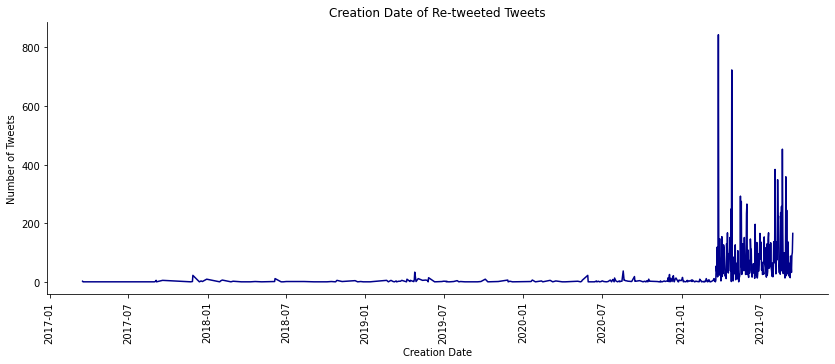

In [ ]:
df.groupby(['retweet_created_at1'])['text'].count().plot(kind='line',rot='vertical',figsize=(14,5),color='darkblue')
plt.title('Creation Date of Re-tweeted Tweets' )
plt.ylabel('Number of Tweets')
plt.xlabel('Creation Date')
sns.despine()

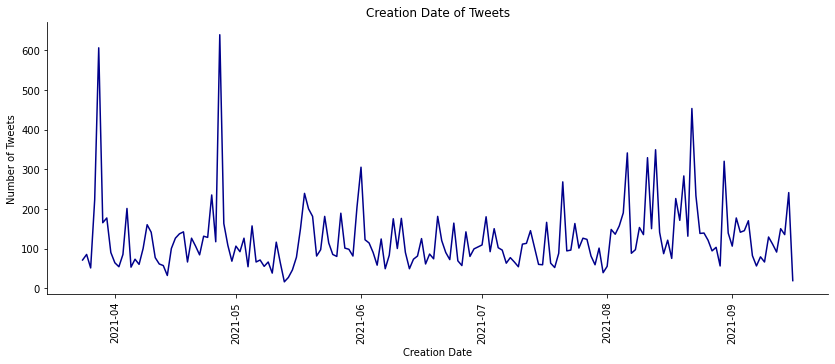

In [ ]:
df.groupby(['created_at1'])['text'].count().plot(kind='line',rot='vertical',figsize=(14,5),color='darkblue')
plt.title('Creation Date of Tweets' )
plt.ylabel('Number of Tweets')
plt.xlabel('Creation Date')
sns.despine()

In [ ]:
df.groupby(['created_at1'])['text'].count().nlargest(10)

created_at1
2021-04-27    639
2021-03-28    606
2021-08-22    453
2021-08-13    349
2021-08-06    341
2021-08-11    329
2021-08-30    320
2021-06-01    305
2021-08-20    283
2021-07-21    268
Name: text, dtype: int64

In [ ]:
print('min tweet data',df['created_at1'].min())
print('max tweet data',df['created_at1'].max())

min tweet data 2021-03-24
max tweet data 2021-09-16


Active time of tweeting

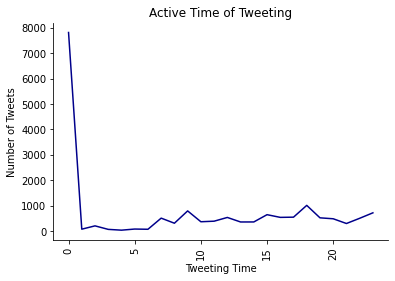

In [ ]:
df.groupby(['retweet_created_at_hour'])['text'].count().plot(kind='line',rot='vertical',color='darkblue')
plt.title('Active Time of Tweeting' )
plt.ylabel('Number of Tweets')
plt.xlabel('Tweeting Time')
sns.despine()

In [ ]:
df.groupby(['retweet_created_at_hour'])['text'].count().reset_index(name='count').sort_values(by='count',ascending=False)

,retweet_created_at_hour,count
0,0.000000,7811
18,18.000000,1014
9,9.000000,796
23,23.000000,721
15,15.000000,648
17,17.000000,550
16,16.000000,542
12,12.000000,539
19,19.000000,524
7,7.000000,512


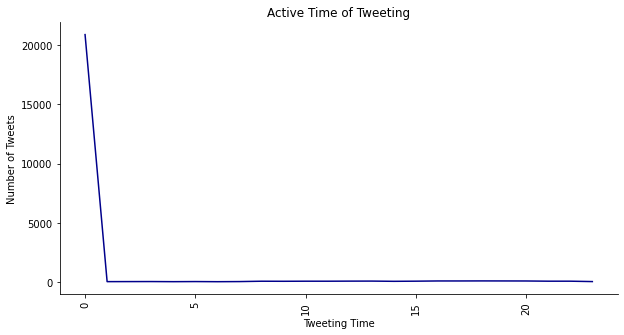

In [ ]:
df.groupby(['created_at_hour'])['text'].count().plot(kind='line',rot='vertical',color='darkblue',figsize=(10,5))
plt.title('Active Time of Tweeting' )
plt.ylabel('Number of Tweets')
plt.xlabel('Tweeting Time')
sns.despine()

In [ ]:
df.groupby(['created_at_hour'])['text'].count().reset_index(name='count').sort_values(by='count',ascending=False)

,created_at_hour,count
0,0,20886
18,18,84
19,19,81
17,17,80
16,16,80
20,20,78
13,13,69
12,12,66
15,15,62
21,21,61


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22091 entries, 30420 to 355700
Columns: 103 entries, user_id to retweet_created_at_hour
dtypes: bool(4), datetime64[ns](4), float64(25), int64(17), object(53)
memory usage: 16.9+ MB


Distribution of users' locations

In [ ]:
df['location'].unique()

array(['Muscat, Oman', 'Jeddah ★', 'Riyadh', ..., 'Nowhere منثبر ف البيت',
       'Syria/Saudi Arabia ', 'الرياض & جـده'], dtype=object)

In [ ]:
df['location']=df['location'].str.strip()

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cit_cou = pd.read_excel("/cities_matching.xlsx")

In [ ]:
cit_cou.columns

Index(['Tweet_con', 'city', 'country'], dtype='object')

In [ ]:
print(len(df.loc[df['location'].isnull()]))
print(len(df.loc[df['location'].notnull()]))

8618
13473


In [ ]:
df.loc[df['location'].isnull(),'city_location']='Not mentioned'
df.loc[df['location'].isnull(),'coun_location']='Not mentioned'

In [ ]:
for i in range (len(df)):
  for j in range(len(cit_cou)):
    if (df['location'].iloc[i]==cit_cou['Tweet_con'].iloc[j]):
      df['city_location'].iloc[i]=cit_cou['city'].iloc[j]
      df['coun_location'].iloc[i]=cit_cou['country'].iloc[j]
    else:
      continue

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.loc[df['city_location']=='','city_location']='Not mentioned'
df.loc[df['city_location'].isnull(),'city_location']='Not mentioned'

df.loc[df['coun_location'].isnull(),'coun_location']='Not mentioned'
df.loc[df['coun_location']=='','coun_location']='Not mentioned'

In [ ]:
df['city_location'].unique()

array(['Not mentioned', 'Riyadh', 'Jeddah', 'Mansoura', 'London', 'Amman',
       'Qassim', 'Hael', 'Abu Dhabi', 'Taif', 'Al Madinah Al Munawwarah',
       'Dammam', 'Berlin', 'Cairo', 'Beirut', 'Ankara', 'Alexandria',
       'Boston', 'Buraydah', 'Khartoum', 'Kharj', 'Dubai', 'Makkah',
       'Khobar', 'Istanbul', 'Paris', 'Dhahran', 'Gaza', 'Alhofuf',
       'Jubail', 'Al Majmah', 'Muscat', 'Abha', 'Fujairah', 'Neom',
       'Shareqah', 'Jazzan'], dtype=object)

In [ ]:
df['coun_location'].unique()

array(['Not mentioned', 'KSA', 'Lebanon', 'Egypt', 'Yemen', 'UK', 'Oman',
       'Jorden', 'Syria', 'Sudan', 'Kuwait', 'UAE', 'Bahrain', 'Germany',
       'Algeria', 'Turkey', 'USA', 'Irish', 'Qatar', 'Iraq',
       'Swizzerland', 'Morocco', 'Libya', 'France', 'Mozambique',
       'Palestine', 'Malaysia', 'Italy', 'Netherlands', 'Switzerland',
       'Jordan'], dtype=object)

In [ ]:
# #cities['New_loc']=cities['New_loc'].apply(arabic_reshaper.reshape).apply(get_display)
# df1=df.loc[df['city_location']!='Not mentioned']
# cit1=df1.groupby('city_location')['text'].count()#.plot(kind='bar')
# cit1=cit1.to_frame()
# cit1['city']=cit1.index
# #cit1['city']=cit1['city'].apply(arabic_reshaper.reshape).apply(get_display)

# cit1.sort_values(by='text', ascending=False).plot(kind='bar',legend=None,color='darkblue',figsize=(10,3))
# plt.title('Location Distribution of Account (Cities) ' )
# plt.ylabel('Number of Tweets')
# plt.xlabel('City Name')
# sns.despine()

In [ ]:
cit1.columns

Index(['text', 'city'], dtype='object')

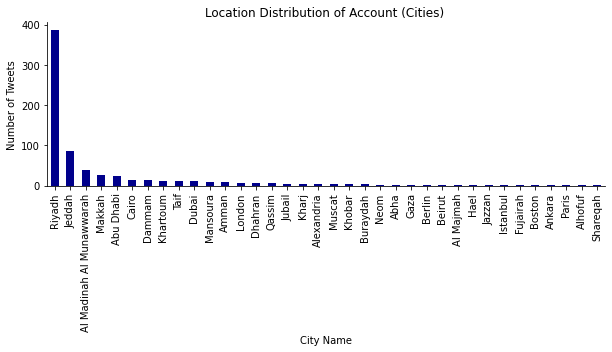

In [ ]:
#cities['New_loc']=cities['New_loc'].apply(arabic_reshaper.reshape).apply(get_display)
df1=df.loc[df['city_location']!='Not mentioned']
cit1=df1.groupby('city_location')['user_id'].nunique()#.plot(kind='bar')
cit1=cit1.to_frame()
cit1['city']=cit1.index
#cit1['city']=cit1['city'].apply(arabic_reshaper.reshape).apply(get_display)

cit1.sort_values(by='user_id', ascending=False).plot(kind='bar',legend=None,color='darkblue',figsize=(10,3))
plt.title('Location Distribution of Account (Cities) ' )
plt.ylabel('Number of Tweets')
plt.xlabel('City Name')
sns.despine()

In [ ]:
# cit1

In [ ]:
cit1.sort_values(by='user_id',ascending=False)

,user_id,city
city_location,,
Riyadh,386,Riyadh
Jeddah,85,Jeddah
Al Madinah Al Munawwarah,39,Al Madinah Al Munawwarah
Makkah,27,Makkah
Abu Dhabi,23,Abu Dhabi
Cairo,15,Cairo
Dammam,13,Dammam
Khartoum,12,Khartoum
Taif,12,Taif


In [ ]:
# #cities1['New_loc']=cities1['New_loc'].apply(arabic_reshaper.reshape).apply(get_display)
# df1=df.loc[df['coun_location']!='Not mentioned']
# coun1=df1.groupby('coun_location')['text'].count()#.plot(kind='bar')
# coun1=coun1.to_frame()
# coun1
# coun1['country']=coun1.index
# #coun1['country']=coun1['country'].apply(arabic_reshaper.reshape).apply(get_display)

# coun1.sort_values(by='text', ascending=False).plot(kind='bar',legend=None,color='darkblue',label=True,figsize=(10,3))
# plt.title('Location Distribution of Account (Countries) ' )
# plt.ylabel('Number of Tweets')
# plt.xlabel('Country Name')
# sns.despine()


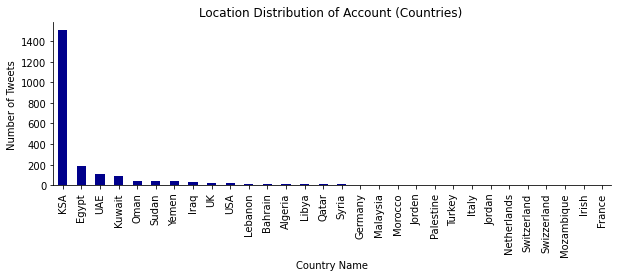

In [ ]:
#cities1['New_loc']=cities1['New_loc'].apply(arabic_reshaper.reshape).apply(get_display)
df1=df.loc[df['coun_location']!='Not mentioned']
coun1=df1.groupby('coun_location')['user_id'].nunique()#.plot(kind='bar')
coun1=coun1.to_frame()
coun1
coun1['country']=coun1.index
#coun1['country']=coun1['country'].apply(arabic_reshaper.reshape).apply(get_display)

coun1.sort_values(by='user_id', ascending=False).plot(kind='bar',legend=None,color='darkblue',label=True,figsize=(10,3))
plt.title('Location Distribution of Account (Countries) ' )
plt.ylabel('Number of Tweets')
plt.xlabel('Country Name')
sns.despine()


In [ ]:
# coun1

In [ ]:
coun1.sort_values(by='user_id',ascending=False)

,user_id,country
coun_location,,
KSA,1507,KSA
Egypt,185,Egypt
UAE,107,UAE
Kuwait,87,Kuwait
Oman,45,Oman
Sudan,44,Sudan
Yemen,38,Yemen
Iraq,32,Iraq
UK,24,UK


New Accounts

In [ ]:
df['created_yyyy-mm'] = pd.to_datetime(df['created_at1']).dt.strftime('%Y-%m')
df['account_yyyy-mm'] = pd.to_datetime(df['account_created_at1']).dt.strftime('%Y-%m')
# df['created_yyyy-mm']=df['created_yyyy-mm'].astype(int)
# df['account_yyyy-mm']=df['account_yyyy-mm'].astype(int)

In [ ]:
lar_=df.groupby(['account_yyyy-mm'])['user_id'].nunique().reset_index(name='count').sort_values(by='account_yyyy-mm',ascending=False)#.nlargest(15,'count')

In [ ]:
lar_.loc[lar_['account_yyyy-mm'].str.contains('2021')]

,account_yyyy-mm,count
169,2021-09,18
168,2021-08,52
167,2021-07,104
166,2021-06,138
165,2021-05,221
164,2021-04,175
163,2021-03,171
162,2021-02,167
161,2021-01,142


In [ ]:
# ff=df.loc[df['account_yyyy-mm'].str.contains('2021')]

In [ ]:
# dd=ff.loc[ff['account_yyyy-mm'].str.contains('2021-09')]

In [ ]:
# dd['user_id'].unique()

In [ ]:
type(df['account_yyyy-mm'])

pandas.core.series.Series

In [ ]:
df['diff']=df['created_at1']-df['account_created_at1']
# df['diff']=pd.to_datetime(df['created_at1']).dt.strftime('%Y-%m')-pd.to_datetime(df['account_created_at1']).dt.strftime('%Y-%m')

In [ ]:
df['diff'].min()

Timedelta('0 days 00:00:00')

In [ ]:
df['diff'].max()

Timedelta('18773 days 00:00:00')

In [ ]:
df['diff_text'] = df['diff'].apply(str).str.extract('(\d+)')
df['diff'] = df['diff'].apply(str).str.extract('([a-zA-Z ]+)', expand=False).str.strip()
df['diff_text']=df['diff_text'].astype(int)

In [ ]:
smallest=df.loc[df['diff_text']==0]

In [ ]:
smallest.columns

Index(['user_id', 'status_id', 'created_at', 'screen_name', 'text', 'source',
       'display_text_width', 'reply_to_status_id', 'reply_to_user_id',
       'reply_to_screen_name',
       ...
       'emoji_count', 'hashtag', 'created_at_hour', 'retweet_created_at_hour',
       'city_location', 'coun_location', 'created_yyyy-mm', 'account_yyyy-mm',
       'diff', 'diff_text'],
      dtype='object', length=109)

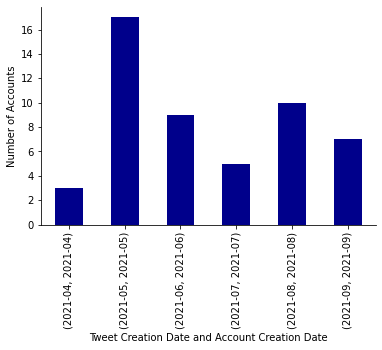

In [ ]:
smallest.groupby(['created_yyyy-mm', 'account_yyyy-mm'])['user_id'].nunique().plot(kind='bar',legend=None,color='darkblue')
#plt.title('Number of New Accounts Based on the Diffrence between Tweet Creation Date and Account Creation Date' )
plt.ylabel('Number of Accounts')
plt.xlabel('Tweet Creation Date and Account Creation Date')
sns.despine()

In [ ]:
smallest.groupby(['created_yyyy-mm', 'account_yyyy-mm'])['user_id'].nunique()

created_yyyy-mm  account_yyyy-mm
2021-04          2021-04             3
2021-05          2021-05            17
2021-06          2021-06             9
2021-07          2021-07             5
2021-08          2021-08            10
2021-09          2021-09             7
Name: user_id, dtype: int64

Tweets **Source**

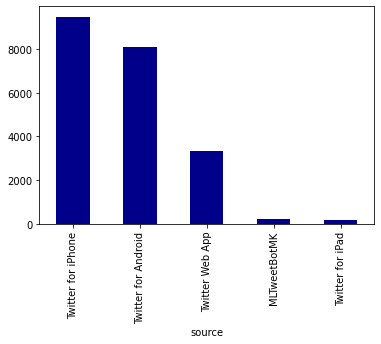

In [ ]:
df.groupby(['source'])['user_id'].count().nlargest(5).plot(kind='bar',legend=None,color='darkblue')

After Deletion (Based on Similarity)

Similarity

In [ ]:
df_retweet=df.loc[df['is_retweet']==True]
new_oner=df_retweet.drop_duplicates(subset=[ 'retweet_created_at1' ,'retweet_status_id','retweet_screen_name'], keep='first')
print('retweet',len(df_retweet))
print(len(new_oner))
#########################################
original_tweet_df=df.loc[df['is_retweet']==False]
new_oneo=original_tweet_df.drop_duplicates(subset=[ 'status_id','created_at1','user_id'], keep='first')#'text' ,
print('original',len(original_tweet_df))
print(len(new_oneo))
#########################################
#df_all_nor=pd.concat([new_oner,new_oneo])
df_all_nor=new_oneo
print(len(df_all_nor))


retweet 17300
2083
original 4791
4419
4419


In [ ]:
len(df)

22091

In [ ]:
len(df_all_nor)

4419

In [ ]:
df_all_nor['max']=df_all_nor['created_at1']
for i in range (len(df_all_nor)):
  #print(i)
  # if ((df_all['retweet_cteated_at1'].iloc[i].notnull()]) & (df_all['cteated_at1'].iloc[i].notnull()]) ):
  #     df_all['max'].iloc[i]=most_sim1_new['retweet_date1'].iloc[i]
  # most_sim1_new['max_id'].iloc[i]=most_sim1_new['id'].iloc[i]
  #print(min)
  if (df_all_nor['created_at1'].iloc[i]>=df_all_nor['max'].iloc[i]):
       df_all_nor['max'].iloc[i]=df_all_nor['created_at1'].iloc[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
len(df_all_nor)

4419

In [ ]:
df_all_nor.insert(0, 'ID', range(1, 1 + len(df_all_nor)))

In [ ]:
# fifth approach (identical similarity)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances

tfidfvectoriser=TfidfVectorizer()
tfidfvectoriser.fit(df_all_nor['text'])
tfidf_vectors=tfidfvectoriser.transform(df_all_nor['text'])

pairwise_similarities=np.dot(tfidf_vectors,tfidf_vectors.T).toarray()
pairwise_differences=euclidean_distances(tfidf_vectors)

data = {'ID':[], 'tweet':[], 'cosine_relation':[]}
def most_similar(doc_id,similarity_matrix,matrix):
    #print (f'Document: {df_all1.iloc[doc_id]["text1"]}')
   # print (f'Document id : {df_all1.iloc[doc_id]["ID"]}')

   # print ('\n')
    #print ('Similar Documents:')
    if matrix=='Cosine Similarity':
        similar_ix=np.argsort(similarity_matrix[doc_id])[::-1]
    elif matrix=='Euclidean Distance':
        similar_ix=np.argsort(similarity_matrix[doc_id])
    for ix in similar_ix:
        if ix==doc_id:
            continue
        print('\n')
        if (similarity_matrix[doc_id][ix]>=0.9):
        #print(f'ID: {df_all1.iloc[ix]["ID"]}')
          data['ID'].append(df_all.iloc[ix]["ID"])

          data['tweet'].append(df_all.iloc[ix]["text"])
          data['cosine_relation'].append(similarity_matrix[doc_id][ix])
          # print (f'Document: {df_all1.iloc[ix]["text1"]}')
          # print (f'Document ID: {df_all1.iloc[ix]["ID"]}')
          # print (f'{matrix} : {similarity_matrix[doc_id][ix]}')
    #pd.DataFrame(data).to_csv('tweet_new_cos_sim.csv', index=False,encoding='utf-8-sig')

#!for i in range(len(df_all1)):
#     #print('************',df_all1['ID'].iloc[i])
  #!most_similar(i,pairwise_similarities,'Cosine Similarity')#df_all1['ID'].iloc[i]
    #most_similar(0,pairwise_differences,'Euclidean Distance')  


In [ ]:
similarities_sorted = pairwise_similarities.argsort()
similarities_sorted

array([[2125, 2279, 2280, ..., 4200, 4315,    0],
       [   0, 2726, 2724, ..., 2581, 1924,    1],
       [   0, 2770, 2769, ..., 3059, 2521,    2],
       ...,
       [2197, 2320, 2324, ..., 4412, 4418, 4416],
       [2197, 2320, 2324, ..., 4412, 4418, 4417],
       [2197, 2320, 2324, ..., 4416, 4412, 4418]])

In [ ]:
len(df_all_nor)

4419

In [ ]:
id_1 = []
id_2 = []
score = []
text1=[]
text2=[]
id1=[]
id2=[]
date1=[]
date2=[]

for index,array in enumerate(similarities_sorted):
    id_1.append(index)
    id_2.append(array[-2])
    score.append(pairwise_similarities[index][array[-2]])
    text1.append(df_all_nor['text'].iloc[index])
    text2.append(df_all_nor['text'].iloc[array[-2]])
    id1.append(df_all_nor['ID'].iloc[index])
    id2.append(df_all_nor['ID'].iloc[array[-2]])
    date1.append(df_all_nor['max'].iloc[index])
    date2.append(df_all_nor['max'].iloc[array[-2]]) #created_at_hour


index_df = pd.DataFrame({'id_1' : id_1,
                          'id_2' : id_2,
                          'id':id1,
                          'id2':id2,
                          'text1':text1,
                          'text2':text2,
                          'retweet_date1':date1,
                          'original_date2':date2,
                          'score' : score})

In [ ]:
most_sim1=index_df.loc[index_df['score']>=0.95]

In [ ]:
len(most_sim1)

189

In [ ]:
for i in most_sim1.index:
  #print(i)
  if (most_sim1['id_1'].loc[i]==most_sim1['id_2'].loc[i]).any():
    # print('yes')
     #index1=df_all1.loc[df_all1['ID']==most_sim1['id_1'].loc[i]].index
     most_sim1=most_sim1.drop(most_sim1['id_1'].loc[i])
    #  most_sim1['matching'].loc[i]='True'
  # else:
  #   print('nothing')

In [ ]:
len(most_sim1)

151

In [ ]:
most_sim1['max']=''
most_sim1['max_id']=''
for i in range (len(most_sim1)):
#   #print(i)
     most_sim1['max'].iloc[i]=most_sim1['retweet_date1'].iloc[i]
     most_sim1['max_id'].iloc[i]=most_sim1['id'].iloc[i]
#   #print(min)
     if (most_sim1['original_date2'].iloc[i]>=most_sim1['max'].iloc[i]):
         most_sim1['max'].iloc[i]=most_sim1['original_date2'].iloc[i]
         most_sim1['max_id'].iloc[i]=most_sim1['id2'].iloc[i]

     else:
        print('nothing to change')

nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to change
nothing to

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
most_sim1['max_id']=most_sim1['max_id'].astype(int)

In [ ]:
len(most_sim1['max_id'].unique())

106

In [ ]:
len(df_all_nor)

4419

In [ ]:
for i in most_sim1['max_id']:
  index=df_all_nor.loc[df_all_nor['ID']==i].index
  #print(index)
  df_all_nor=df_all_nor.drop(index)

In [ ]:
len(df_all_nor)

4313

In [ ]:
df_all1=pd.concat([df_all_nor,new_oner])
len(df_all1)

6396

Tweet content

In [ ]:
#URL
url=df_all1[(df_all1['urls_url'].notnull()) & (df_all1['media_url'].isna())]
len(url)

1511

In [ ]:
#media
medi=df_all1[df_all1[ 'media_url'].notnull()]
len(medi)

1313

In [ ]:
medi.groupby('media_type')['media_url'].count()

media_type
photo           1310
photo, photo       3
Name: media_url, dtype: int64

In [ ]:
text=df_all1[(df_all1['urls_url'].isna()) & (df_all1['media_url'].isna())]
len(text)

3572

Text Preprocessing

Removing Hahstags from Tweets


In [ ]:
df_all1['text_wou_h']=''
for i in range(len(df_all1['text'])):
    df_all1['text_wou_h'].iloc[i]=araby.strip_diacritics((df_all1['text'].iloc[i]))
    df_all1['text_wou_h'].iloc[i]= df_all1['text_wou_h'].iloc[i].strip()
     

for i in range(len(df_all1['text'])):
    df_all1['text_wou_h'].iloc[i]=re.sub(r'#(\w+)', '  ', str(df_all1['text'].iloc[i]))
#df_all1[['text_wou_h']]

# df_all1['text2']=''
# for i in range(len(df_all1['text_wou_h'])):
#     df_all1['text2'].iloc[i]=text_normalization((df_all1['text_wou_h'].iloc[i]))
    
# df_all1[['text2']]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Removing Stopwords

In [ ]:

#to remove hamzah and tashkeel
stops = set(stopwords.words("arabic"))
stop_word_comp = {"،","آض","آمينَ","آه"
                  ,"آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل","أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا"
                  ,"أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما"
                  ,"أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك"
                  ,"إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق"
                  ,"اذا","اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى"
                  ,"التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين","اللذان","اللذين","اللواتي"
                  ,"الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي","ايار","ايام","ايضا"
                  ,"ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع","بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى"
                  ,"بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك"
                  ,"تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي"
                  ,"حتى","حرى","حسب","حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا"
                  ,"ذات","ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع"
                  ,"رويدك","ريث","رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ"
                  ,"صار","صباح","صفر","صهٍ","صهْ","ضد","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا"
                  ,"عدة","عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين"
                  ,"عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد"
                  ,"قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا"
                  ,"كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت","كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما"
                  ,"لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي","لكيلا","للامم","لم","لما","لمّا","لن","لنا","له"
                  ,"لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ"
                  ,"لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا","مازال","مافتئ","مايو","متى","مثل","مذ"
                  ,"مساء","مع","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليون","مما","ممن","من","منذ","منها","مه"
                  ,"مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم","هاكَ","هاهنا","هبّ"
                  ,"هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا","هيت","هيّا"
                  ,"هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد"
                  ,"واضاف","واضافت","واكد","وان","واهاً","واوضح","وراءَك","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت"
                  ,"ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","ّأيّان","اذن","ايش","دي","مش",
                  "عندي","انك","ايه","مره","لكل","الآن","لان","انا","إنك","لأن","مرة","إيه","فيه","اللي" ,
                  "ده","لذلك","عبر","عشان","حد","مثلا","مثلاً","مو","زي","وكذل","ال","وال","الت","ان","دة","عشان","حد","مُش","دَه",'زي','إيه','ليه','أل',
                  'إنه','إنّه','انّه','آل','و التي','انت','إنت','أنتِ','ليش','لأنه','لانه','إيش','مثل','جدا','جداً',
                  "دا",'دي','ديه','وده','ملهاش','لحد','وغيرها','و غيرها','دية','ودة','كدي','فقط','احد','أحد','وت'} 

In [ ]:
lst = [' ' + x + ' ' for x in stop_word_comp]

In [ ]:
from stop_words import get_stop_words
stops = set(stopwords.words("arabic"))

df_all1['text1']=df_all1['text_wou_h']

df_all1['text1']=df_all1['text1'].apply(lambda x: ' '.join([word for word in x.split() if word not in get_stop_words('arabic')]))
df_all1['text1']=df_all1['text1'].apply(lambda x: ' '.join([word for word in x.split() if word not in get_stop_words('english')]))
#df_all1['text1']=df_all1['text1'].apply(lambda x: ' '.join([word for word in x.split() if word not in stops ]))
df_all1['text1']=df_all1['text1'].apply(lambda x: ' '.join([word for word in x.split() if word not in stops and word not in lst ]))
df_all1['text1'] = df_all1['text1'].str.lower()
pat = '|'.join(r"\b{}\b".format(x) for x in lst)
df_all1['text1'] =df_all1['text1'].str.replace(pat, '')



df_all1['text2']=df_all1['text']

#.apply(lambda x: [item for item in x if item not in get_stop_words('arabic')])
df_all1['text2']=df_all1['text2'].apply(lambda x: ' '.join([word for word in x.split() if word not in get_stop_words('arabic')]))
df_all1['text2']=df_all1['text2'].apply(lambda x: ' '.join([word for word in x.split() if word not in get_stop_words('english')]))
df_all1['text2']=df_all1['text2'].apply(lambda x: ' '.join([word for word in x.split() if word not in stops and word not in lst ]))
df_all1['text2'] = df_all1['text2'].str.lower()
#.apply(lambda x: [item for item in x if item not in get_stop_words('arabic')])


In [ ]:
#df_all1['text1']=''
for i in range(len(df_all1['text1'])):
    df_all1['text1'].iloc[i]=araby.strip_diacritics((df_all1['text1'].iloc[i]))
    #df_all1['text1'].iloc[i]= df_all1['text1'].iloc[i].strip()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
def text_normalization(x):

    #x=x.str.strip()
    #x=x.replace({' +':' '})#,regex=True
    x = re.sub("@[A-Za-z0-9]+","",str(x)) #Remove @ sign
    x = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", str(x)) #Remove http links
    x=re.sub(r"#[A-Za-z0-9]|\\w+(?:\\.\\w+)*/\\S+", "",str(x))
    x = x.replace('RT|cc', ' ') # remove RT and cc
    x=x.replace(r'#'," ").replace("_", " ")
    x=x.replace('ة','ه ')#, regex=True
    x=x.replace('أ','ا')#, regex=True
    x=x.replace('إ','ا')#, regex=True
    x=x.replace(r'[\(\)\d]', '-')#,regex=True)
    x = x.replace('\n&\n',' ')#, regex=True)
    x = x.replace('&',' ')#, regex=True)
    x = x.replace('\n',' ')#, regex=True)
    x = x.replace(' \n',' ')#, regex=True)
    x = x.replace(' ... ','')#, regex=True)
    x=re.sub("\.\.\.", "", str(x))
    x = x.replace('\n\n',' ')#, regex=True)
    x = x.replace('\\n',' ')#, regex=True)
    x = x.replace('\n ',' ')#, regex=True)
    x = x.replace('/',' ')#, regex=True)
    # = x.replace('ال...',' ')#, regex=True)
    #x = re.sub('ال...', ' ', str(x))
    #x = re.sub('...', '', str(x))
    x = x.replace('عالم بيانات','عالم البيانات')#, regex=True)
    #x = ''.join(c for c in x if c not in emoji.UNICODE_EMOJI) #Remove Emojis 
    x = x.replace('0',' ')#, regex=True)
    #x=[re.sub("(?:\@|http?\://|https?\://|www)\S+", "", x) for x in (x)]
    #x=[re.sub("@[A-Za-z0-9]+","", x) for x in (x)]
    #x=[re.sub("#[A-Za-z0-9]|\\w+(?:\\.\\w+)*/\\S+", "", x) for x in (x)]
    x = re.sub(r"\\n",' ',str(x)) # Delete \n
    x = re.sub(r"\[\'",' ',str(x)) # Delete ['
    x = re.sub(r"\'\]",' ',str(x)) # Delete ']
    x = re.sub(r"pic.twitter.com/.*$",'',str(x))# Delete ']
    x= re.sub(emoji.get_emoji_regexp(), r"", x)
    #x=re.sub(r'(?<=\w)[^\s\w](?![^\s\w])', '', str(x)) #panctuation 
    #x = x.str.strip()
    x= re.sub(r'[^\w\s]',' ',str(x))  #pancutaion 
    x= re.sub(r"\d",' ',str(x))  #removing numbers 
    #x = re.sub(r'\s*[A-Za-z]+\b', '' , str(x))#removing english words
    x =re.sub(r'(.)\1+', r'\1\1', str(x)) 
    x=x.replace(' م ','')
    x=x.replace('آ','ا')
    x=x.replace(' ال ','')
    x=x.replace(' ب ','')
    x=x.replace(' بـ ','')
    x=x.replace(' هـ ','')
    x=x.replace(' ع ','')
    x=x.replace(' اللي ','')
    x=x.replace(' بالـ ','')
    x=x.replace(' لك ','')
    x=x.replace(' هل ','')
    x=x.replace(' علي ','')
    x=x.replace(' بس ','')
    x=x.replace(' راح ','')
    x=x.replace(' بس ','')
    x=x.replace(' الي ','')
    x=x.replace(' اني ','')
    x=x.replace(' ت ','')
    x=x.replace(' ل ','')
    x=x.replace(' بال ','')
    x=x.replace(' وليس ','')
    x=x.replace('الـ','')
    #x=x.replace(' الد  ولي ',' الدولي ')

   # x=x.replace(' للس يدات ')

#     x=x.replace(' د ','')
#     x=x.replace(' ا ','')
    x = re.sub('\s+', ' ', str(x)) #remove double spacing

    print(x)
    return x

In [ ]:
#df_all1['text1']=''
for i in range(len(df_all1['text1'])):
    df_all1['text1'].iloc[i]=text_normalization((df_all1['text1'].iloc[i]))
df_all1[['text1']]


الدورات المفيده للبدء ماجستير 
 lo بليز تذكرينيوحده تقول اشالشركات كلها تقول ذكاء اصطناعي النهايه يطلع تعلم اله قلتلها طب تعلم الاله الذكاء الاصطناعي مصره انو الذكاء الاصطناعي كدا شي تحطيه مكان بنفسه يعرف شي مقتنعه تماما برايها لين صرت اقولها طيب طيب النهايه 
 arabic تخصص البيانات تخصص يشكل مجالاتلابد البحث مصدر موثوق يقدم معلومات مكثفه فيه مواقع تقدم مايسمى track مسار تدريبي ضمنها طبعا كورسيراانصح بالبحث يسمى bootcampالمخيمات التدريبيه لانها تكون شامله ومكثفه بالتوفيق 
 دوله مؤسسه شركه دلوقتي بتعتمد قرارتها جمع تحليل البيانات معالجتها اتخاذ القرارالي مصر الرقميه متجهه تطويرها قطاعتهالحد رخيص هيضيف كتير لازما نقرب العالممسابقنا data science العلوم الاساسيه لل ai amp machine learning
 egypt ضحك كتير لانيبديكو اهميه خالص فاشرط اراجع كلامي لاني وقتي قليل وبتكلم معا ناس تافه فااديهم اهميه ليه تاني حاجه جاهلتكبر الحمد لله بتكلم لغتين والتخصص data scientist الحمد لله فاهضيع وقت معا هبل ذيكو تتكلمو اتكلمو جماعتكو فقط 
 مافي شي اسمه ارسال بيانات جمع بينات شيء سيري لتحسين الخدمه عقب العالم زعلت

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Streaming output truncated to the last 5000 lines.
 sama اغلبها وظائف تقنيه حتكون اهميه وظائف جديده بمسميات جديده ولسا نقدر نتنبئ بالمستقبلنعرفها حاليا موجوده ومي مشهوره مهندس روبوتيك عالم البيانات مهندس سحابي تعلم الاله مشروعي التخرج الذكاء الاصطناعي 
كورس python data science amp machine learning a z بسعر مجاني لمده دقيقه وعدد المشتركين مشترك تقييمه تقييم ومدته ساعه لغه الكورس الانجليزيه 
كورس python introduction data science machine learning a z بسعر مجاني لمده يومين وعدد المشتركين مشترك تقييمه تقييم ومدته ساعه لغه الكورس الانجليزيه 
 الاقامه الذهبيه تعطى لهذا الفئات اوائل الثانويه العامه الدوله اسرهم الحاصلون شهادات تخصصيه الذكاء الاصطناعي البيانات الضخمه الاوبئه والفيروسات اصحاب المواهب التخصصيه المهندسون مجالات هندسه الكمبيوتر والالكترونيات والبرمجه والكهرباء والتكنولوجيا الحيويه 
القاكم الساعه ندوه استخدام البيانات الاعلام وساعرض تطبيق قمت بكتابه r لتحليل الاعلام المقروء والمرئي مهمالاعلامين والمهتمين صحافه البيانات رابط الندوه 
 بالنسبه لضمان ماعندي العمر سنه خليه يقدم ويشوف يقد

,text1
30420,الدورات المفيده للبدء ماجستير
1991,lo بليز تذكرينيوحده تقول اشالشركات كلها تقول ذكاء اصطناعي النهايه يطلع تعلم اله قلتلها طب تعلم الاله الذكاء الاصطناعي مصره انو الذكاء الاصطناعي كدا شي تحطيه مكان بنفسه يعرف شي مقتنعه تماما برايها لين صرت اقولها طيب طيب النهايه
295364,arabic تخصص البيانات تخصص يشكل مجالاتلابد البحث مصدر موثوق يقدم معلومات مكثفه فيه مواقع تقدم مايسمى track مسار تدريبي ضمنها طبعا كورسيراانصح بالبحث يسمى bootcampالمخيمات التدريبيه لانها تكون شامله ومكثفه بالتوفيق
317217,دوله مؤسسه شركه دلوقتي بتعتمد قرارتها جمع تحليل البيانات معالجتها اتخاذ القرارالي مصر الرقميه متجهه تطويرها قطاعتهالحد رخيص هيضيف كتير لازما نقرب العالممسابقنا data science العلوم الاساسيه لل ai amp machine learning
327290,egypt ضحك كتير لانيبديكو اهميه خالص فاشرط اراجع كلامي لاني وقتي قليل وبتكلم معا ناس تافه فااديهم اهميه ليه تاني حاجه جاهلتكبر الحمد لله بتكلم لغتين والتخصص data scientist الحمد لله فاهضيع وقت معا هبل ذيكو تتكلمو اتكلمو جماعتكو فقط
...,...
292668,شرح تخصص البيانات
2320,ماجستير البيانات
151669,البيانات
230084,تعلم الاله


In [ ]:
# df_all1[['text1']]

Number of character in tweets

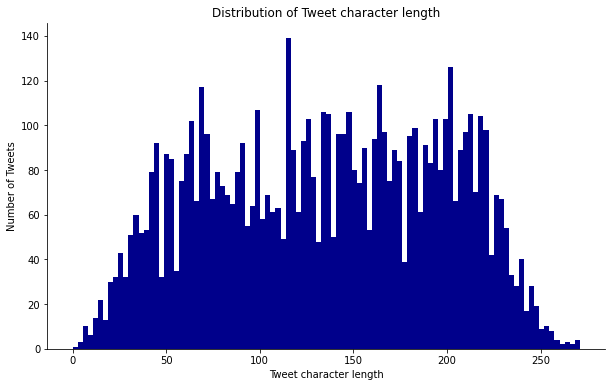

In [ ]:
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in df_all1.text1]
plt.hist(doc_lens, bins = 100,color='darkblue')
plt.title('Distribution of Tweet character length')
plt.ylabel('Number of Tweets')
plt.xlabel('Tweet character length')
sns.despine()

Words Frequency

In [ ]:
df_all1['text1'].str.split(expand=True).stack().value_counts().nlargest(10)

البيانات     4403
الاله        1353
تعلم         1304
learning      949
الاصطناعي     793
data          774
machine       741
الذكاء        679
بيانات        608
عالم          545
dtype: int64

In [ ]:

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_all1['text1'], 30)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 30 unigrams in the question text after removing stop words and lemmatization"))
fig.show()


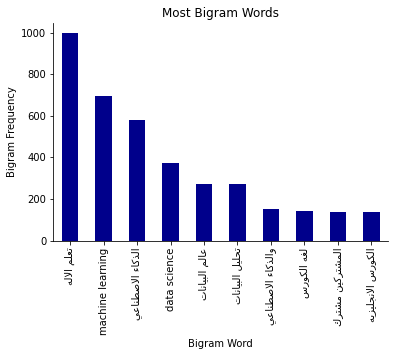

In [ ]:
from sklearn.feature_extraction.text import  CountVectorizer
vect =  CountVectorizer(ngram_range = (2,2))
sparse_matrix = vect.fit_transform(df_all1['text1'])

#bigram_df = pd.DataFrame(vect.fit_transform(data_ds['text1']).todense(), columns = vect.get_feature_names())
frequencies = sum(sparse_matrix).toarray()[0]
df_wo=pd.DataFrame(frequencies, index=vect.get_feature_names(), columns=['frequency'])
df_wo['word']=df_wo.index

#df_wo = df_wo.rename_axis('word')
#df_wo1=
#df_wo.columns.values[0] = 'Signal'
#df_wo.columns.names = ['word']
#df_wo=df_wo.rename_axis('word')#.reset_index()
# p = df_wo.index.values
# p
#df_wo.reset_index(inplace=True)
#df_wo.reset_index(drop=True)
top_w=df_wo.nlargest(10, 'frequency')
top_w['word1']=top_w['word'].apply(arabic_reshaper.reshape).apply(get_display)
top_w.plot(kind='bar',x='word1'  ,y='frequency',legend=None,color='darkblue')
plt.title('Most Bigram Words' )
plt.ylabel('Bigram Frequency')
plt.xlabel('Bigram Word')
sns.despine()

Discussed Topics

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=100, token_pattern='\w+|\$[\d\.]+|\S+')
# apply transformation
tf = vectorizer.fit_transform(df_all1['text1']) #.toarray()
# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()
tf.shape # --> (200000, 2296)

(6396, 94)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
number_of_topics = 10
model = LatentDirichletAllocation(n_components=number_of_topics, random_state=45) # random state for reproducibility
# Fit data to model
model.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=45, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
model.components_

array([[1.00006123e-01, 1.00012007e-01, 1.00001488e-01, 1.00001087e-01,
        1.00008818e-01, 1.00002731e-01, 7.94852709e-01, 1.00002965e-01,
        7.56804089e+01, 1.00004145e-01, 1.00000837e-01, 1.00002748e-01,
        1.00020838e-01, 1.00003283e-01, 1.00005382e-01, 1.00001377e-01,
        1.00001101e-01, 1.00004738e-01, 4.47696983e+02, 1.00000501e-01,
        1.00013282e-01, 1.00007494e-01, 1.00007465e-01, 1.00002483e-01,
        1.00001832e-01, 1.00001549e-01, 1.00005002e-01, 1.00007156e-01,
        1.36725888e+01, 1.00004039e-01, 1.00000979e-01, 1.00002419e-01,
        1.58981381e+00, 1.00001321e-01, 5.60835560e+01, 1.00006141e-01,
        1.00007818e-01, 1.00002548e-01, 1.00004302e-01, 1.00067989e-01,
        1.00000543e-01, 1.00003464e-01, 6.07576568e+02, 2.37105524e+01,
        1.00004531e-01, 1.00010354e-01, 1.00004475e-01, 1.00019335e-01,
        1.00008628e-01, 1.00005190e-01, 3.03580169e+01, 1.00001595e-01,
        1.00004766e-01, 1.00001243e-01, 1.00000000e-01, 3.235103

In [ ]:
for index, topic in enumerate(model.components_):
    print(f'Top 5 words for Topic #{index}')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

Top 5 words for Topic #0
['تحليل', 'تعلن', 'تكون', 'شهاده', 'المعلومات', 'دوره', 'سجل', 'الاتصالات', 'وزاره', 'مجانيه', 'مقدمه', 'يجب', 'البيانات', 'عالم', 'بيانات']


Top 5 words for Topic #1
['المعلومات', 'تقنيات', 'تطبيق', 'منصه', 'معسكر', 'سجل', 'استخدام', 'شهاده', 'باستخدام', 'العميق', 'مجانا', 'خوارزميات', 'التعلم', 'تعلم', 'الاله']


Top 5 words for Topic #2
['تقييمه', 'وعدد', 'learning', 'مشترك', 'المشتركين', 'python', 'الانجليزيه', 'لمده', 'لغه', 'الكورس', 'ساعه', 'مجاني', 'كورس', 'science', 'data']


Top 5 words for Topic #3
['تكون', 'التقنيه', 'مجانيه', 'مقدمه', 'تطبيقات', 'مجالات', 'دوره', 'تقنيه', 'دورات', 'بايثون', 'تطوير', 'لغه', 'المعلومات', 'البيانات', 'البرمجه']


Top 5 words for Topic #4
['العمل', 'برنامج', 'خوارزميات', 'البيانات', 'الاعمال', 'تعلن', 'المستقبل', 'ai', 'التسجيل', 'شركه', 'علم', 'الالي', 'التعلم', 'machine', 'learning']


Top 5 words for Topic #5
['التخصصات', 'علم', 'الالي', 'المعلومات', 'التقنيه', 'الامن', 'الاشياء', 'السيبراني', 'هندسه', 'الحاسب', 'ع

In [ ]:
def show_topics(vectorizer=vectorizer, lda_model=model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=model, n_words=10)

df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords.T


,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
Word 0,بيانات,الاله,data,البرمجه,learning,الاصطناعي,البيانات,البيانات,مجال,البيانات
Word 1,عالم,تعلم,science,البيانات,machine,الذكاء,افضل,تحليل,المجال,الاحصاء
Word 2,البيانات,التعلم,كورس,المعلومات,التعلم,البيانات,التخصصات,الضخمه,باستخدام,تخصص
Word 3,يجب,خوارزميات,مجاني,لغه,الالي,والذكاء,العالم,data,برمجه,برنامج
Word 4,مقدمه,مجانا,ساعه,تطوير,علم,علوم,العمل,منصه,ممكن,اهم
Word 5,مجانيه,العميق,الكورس,بايثون,شركه,الحاسب,بناء,تعرف,مشروع,جامعه
Word 6,وزاره,باستخدام,لغه,دورات,التسجيل,هندسه,استخدام,للتسجيل,موقع,عمل
Word 7,الاتصالات,شهاده,لمده,تقنيه,ai,السيبراني,تقنيات,مجموعه,يعني,رابط
Word 8,سجل,استخدام,الانجليزيه,دوره,المستقبل,الاشياء,برنامج,معسكر,تطبيقات,تطبيق
Word 9,دوره,سجل,python,مجالات,تعلن,الامن,تطوير,يتم,python,علوم


In [ ]:
# df_topic_keywords.T
# import pyLDAvis
# #import pyLDAvis.gensim_models as gensimvis

# pyLDAvis.enable_notebook()
# pyLDAvis.sklearn.prepare(model, tf, vectorizer, mds='tsne')

# Specific words

In [ ]:
print('كورس',len(df_all1.loc[df_all1['text1'].str.contains('كورس')]))
print('دوره',len(df_all1.loc[df_all1['text1'].str.contains('دوره')]))
print('برنامج',len(df_all1.loc[df_all1['text1'].str.contains('برنامج')]))
print('معسكر',len(df_all1.loc[df_all1['text1'].str.contains('برنامج')]))

كورس 406
دوره 268
برنامج 307
معسكر 307


In [ ]:
len(df)

22091

In [ ]:
li=['كورس','دورة','برنامج','معسكر']
# pattern='|'.join(li)
for i in li:
  print(i)
  df.loc[df['text'].str.contains(i),'contain']=True

كورس
دورة
برنامج
معسكر


In [ ]:
len(df.loc[df['contain']==True])

4689

Discussed Topic (other approach)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

n_features = 104
n_components = 10 # number of topics
n_top_words = 20

# ignore terms that have a document frequency strictly higher than 95%, 
# ignore terms that have a document frequency strictly lower than 2
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features)
tfidf = tfidf_vectorizer.fit_transform(df_all1['text1'].values.astype(str))

# alpha=0 means no regularization, l1_ratio=.5, the penalty is a combination of L1 and L2
nmf = NMF(n_components=n_components, random_state=1, alpha=.1, l1_ratio=.5).fit(tfidf)
nmf_output = nmf.fit_transform(tfidf)

def show_topics(vectorizer=tfidf_vectorizer, lda_model=nmf, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=tfidf_vectorizer, lda_model=nmf, n_words=10)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]

# Topics_theme = ['Word start from ph', 'People/Friend/Relationship', 'Life/Experience/Love/Purpose', 'Money/Internet/Business', 
#                 'Weekend/Parent/Child', 'Leisure time', 'Language/technique/software', 'Relationship/Girl/Boy', 
#                 'Business relate to India, China or Pakistan', 'Friend/Love/Relationship', 'Difference and similarity/Language/Engineering', 
#                 'Culture, travel and visa requirements in several countries', 'Tips on working as software engineering', 'Book/Movie/Class/History/Physics/Chemistry/Science', 
#                 'Software engineer job opportunitis in Canada', 'Love/Life/Relationship', 'World/War/Language/History', 'Day/Hour/Week/Month/Sex/Place', 'School/Student/College/University', 
#                 'Question/Answer/Quora/Interview']
# df_topic_keywords['topic_theme'] = Topics_theme
#df_topic_keywords.set_index('topic_theme', inplace=True)
df_topic_keywords.T


,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
Word 0,البيانات,الاله,learning,بيانات,data,الاصطناعي,مجاني,تحليل,مجال,المعلومات
Word 1,الضخمه,تعلم,machine,عالم,science,الذكاء,كورس,الضخمه,العمل,الاحصاء
Word 2,افضل,باستخدام,ai,العالم,ممكن,والذكاء,لغه,مشروع,المجال,علوم
Word 3,عالم,خوارزميات,التعلم,يجب,ai,التعلم,ساعه,بيانات,موقع,الحاسب
Word 4,علم,التعلم,ممكن,تكون,تخصص,الالي,الكورس,برمجه,مشاريع,برنامج
Word 5,تخصص,استخدام,الالي,تطبيق,المجال,السيبراني,لمده,بايثون,كتاب,دوره
Word 6,وتحليل,العميق,كورس,العمل,علوم,العميق,المشتركين,باستخدام,والذكاء,علم
Word 7,يتم,معسكر,يعني,مجموعه,تكون,الاشياء,الانجليزيه,البيانات,التسجيل,الاتصالات
Word 8,مقدمه,افضل,خوارزميات,شركه,الضخمه,وتعلم,مشترك,مجموعه,مشروع,وزاره
Word 9,يجب,مقدمه,باستخدام,يعني,يعني,تقنيات,وعدد,الاعمال,خدمه,تخصص


EXTRA DATA ANALYSIS

In [ ]:
# df.columns

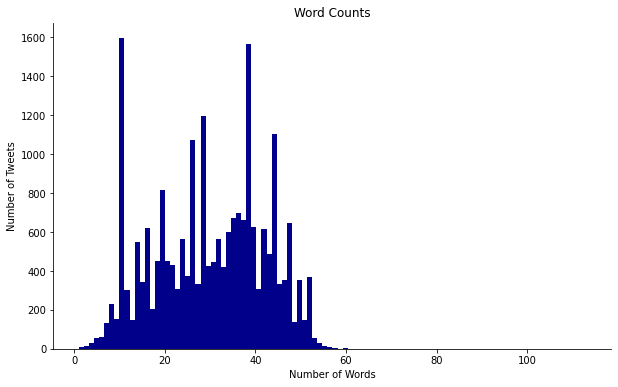

In [ ]:
#df['word_count'].hist()
plt.figure(figsize=(10,6))
plt.hist(df['word_count'], bins = 100,color='darkblue')
plt.title('Word Counts')
plt.ylabel('Number of Tweets')
plt.xlabel('Number of Words')
sns.despine()

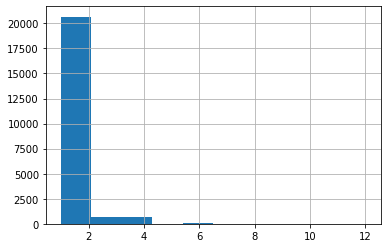

In [ ]:
df['mention_counts'].hist()

In [ ]:
df['mention_counts'].unique()

array([ 1,  2,  9, 12,  3,  4,  5,  7,  6, 11, 10,  8])

In [ ]:
df['stopwords'].unique()

array([ 1, 14, 12, 10,  3, 16, 13, 15,  8,  2, 11, 19, 21, 18, 17,  6,  9,
        7,  5,  4,  0])

In [ ]:
df['hash_counts'].unique()

array([ 1,  2,  3,  5,  7,  6,  4,  8, 11,  9, 14, 10, 12, 13])

In [ ]:
df['emoji_count'].unique()

array([ 0,  3,  2,  1,  9,  4,  6,  5,  7,  8, 15, 10, 11])